# Imports

In [662]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import display
# Label encoding
from sklearn.preprocessing import LabelEncoder
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [663]:
df = pd.read_csv("/content/drive/MyDrive/Spotify_Youtube.csv")

#spotify and youtube
this data represents songs of various artist in the world and some brief information about them

In [664]:
df.shape

(20718, 28)

In [665]:
df.rename(columns={"Unnamed: 0": "id"}, inplace=True)

In [666]:
df.head(10).T

0  \
id                                                                0   
Artist                                                     Gorillaz   
Url_spotify       https://open.spotify.com/artist/3AA28KZvwAUcZu...   
Track                                                Feel Good Inc.   
Album                                                    Demon Days   
Album_type                                                    album   
Uri                            spotify:track:0d28khcov6AiegSCpG5TuT   
Danceability                                                  0.818   
Energy                                                        0.705   
Key                                                             6.0   
Loudness                                                     -6.679   
Speechiness                                                   0.177   
Acousticness                                                0.00836   
Instrumentalness                                            0.00233   
Liveness                                                      0.613   
Valence                                                       0.772   
Tempo                                                       138.559   
Duration_ms                                                222640.0   
Url_youtube             https://www.youtube.com/watch?v=HyHNuVaZJ-k   
Title                    Gorillaz - Feel Good Inc. (Official Video)   
Channel                                                    Gorillaz   
Views                                                   693555221.0   
Likes                                                     6220896.0   
Comments                                                   169907.0   
Description       Official HD Video for Gorillaz' fantastic trac...   
Licensed                                                       True   
official_video                                                 True   
Stream                                                 1040234854.0   

                                                                  1  \
id                                                                1   
Artist                                                     Gorillaz   
Url_spotify       https://open.spotify.com/artist/3AA28KZvwAUcZu...   
Track                                               Rhinestone Eyes   
Album                                                 Plastic Beach   
Album_type                                                    album   
Uri                            spotify:track:1foMv2HQwfQ2vntFf9HFeG   
Danceability                                                  0.676   
Energy                                                        0.703   
Key                                                             8.0   
Loudness                                                     -5.815   
Speechiness                                                  0.0302   
Acousticness                                                 0.0869   
Instrumentalness                                           0.000687   
Liveness                                                     0.0463   
Valence                                                       0.852   
Tempo                                                        92.761   
Duration_ms                                                200173.0   
Url_youtube             https://www.youtube.com/watch?v=yYDmaexVHic   
Title             Gorillaz - Rhinestone Eyes [Storyboard Film] (...   
Channel                                                    Gorillaz   
Views                                                    72011645.0   
Likes                                                     1079128.0   
Comments                                                    31003.0   
Description       The official video for Gorillaz - Rhinestone E...   
Licensed                                                       True   
official_video                                                 True   
Stream            

In [667]:
df.describe()

id  Danceability        Energy           Key      Loudness  \
count  20718.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean   10358.500000      0.619777      0.635250      5.300348     -7.671680   
std     5980.915774      0.165272      0.214147      3.576449      4.632749   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5179.250000      0.518000      0.507000      2.000000     -8.858000   
50%    10358.500000      0.637000      0.666000      5.000000     -6.536000   
75%    15537.750000      0.740250      0.798000      8.000000     -4.931000   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20716.000000  20716.000000      20716.000000  20716.000000   
mean       0.096456      0.291535          0.055962      0.193521   
std        0.111960      0.286299          0.193262      0.168531   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.045200          0.000000      0.094100   
50%        0.050500      0.193000          0.000002      0.125000   
75%        0.103000      0.477250          0.000463      0.237000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  20716.000000  20716.000000  2.071600e+04  2.024800e+04  2.017700e+04   
mean       0.529853    120.638340  2.247176e+05  9.393782e+07  6.633411e+05   
std        0.245441     29.579018  1.247905e+05  2.746443e+08  1.789324e+06   
min        0.000000      0.000000  3.098500e+04  0.000000e+00  0.000000e+00   
25%        0.339000     97.002000  1.800095e+05  1.826002e+06  2.158100e+04   
50%        0.537000    119.965000  2.132845e+05  1.450110e+07  1.244810e+05   
75%        0.726250    139.935000  2.524430e+05  7.039975e+07  5.221480e+05   
max        0.993000    243.372000  4.676058e+06  8.079649e+09  5.078865e+07   

           Comments        Stream  
count  2.014900e+04  2.014200e+04  
mean   2.751899e+04  1.359422e+08  
std    1.932347e+05  2.441321e+08  
min    0.000000e+00  6.574000e+03  
25%    5.090000e+02  1.767486e+07  
50%    3.277000e+03  4.968298e+07  
75%    1.436000e+04  1.383581e+08  
max    1.608314e+07  3.386520e+09

In [668]:
df.isna().sum()

id                    0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

# Preprocessing and Data preparation

there are some columns that aren't of any use for us so i'll just drop them

In [669]:
df.drop(["Url_spotify","Uri","Url_youtube","Title","Channel","Comments","Description"], axis='columns', inplace=True)

In [670]:
df.T

0                1      \
id                             0                1   
Artist                  Gorillaz         Gorillaz   
Track             Feel Good Inc.  Rhinestone Eyes   
Album                 Demon Days    Plastic Beach   
Album_type                 album            album   
Danceability               0.818            0.676   
Energy                     0.705            0.703   
Key                          6.0              8.0   
Loudness                  -6.679           -5.815   
Speechiness                0.177           0.0302   
Acousticness             0.00836           0.0869   
Instrumentalness         0.00233         0.000687   
Liveness                   0.613           0.0463   
Valence                    0.772            0.852   
Tempo                    138.559           92.761   
Duration_ms             222640.0         200173.0   
Views                693555221.0       72011645.0   
Likes                  6220896.0        1079128.0   
Licensed                    True             True   
official_video              True             True   
Stream              1040234854.0      310083733.0   

                                                          2      \
id                                                            2   
Artist                                                 Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown)   
Album             New Gold (feat. Tame Impala and Bootie Brown)   
Album_type                                               single   
Danceability                                              0.695   
Energy                                                    0.923   
Key                                                         1.0   
Loudness                                                  -3.93   
Speechiness                                              0.0522   
Acousticness                                             0.0425   
Instrumentalness                                         0.0469   
Liveness                                                  0.116   
Valence                                                   0.551   
Tempo                                                   108.014   
Duration_ms                                            215150.0   
Views                                                 8435055.0   
Likes                                                  282142.0   
Licensed                                                   True   
official_video                                             True   
Stream                                               63063467.0   

                               3               4            5      \
id                                 3               4            5   
Artist                      Gorillaz        Gorillaz     Gorillaz   
Track             On Melancholy Hill  Clint Eastwood         DARE   
Album                  Plastic Beach        Gorillaz   Demon Days   
Album_type                     album           album        album   
Danceability                   0.689           0.663         0.76   
Energy                         0.739           0.694        0.891   
Key                              2.0            10.0         11.0   
Loudness                       -5.81          -8.627       -5.852   
Speechiness                    0.026           0.171       0.0372   
Acousticness                0.000015          0.0253       0.0229   
Instrumentalness               0.509             0.0       0.0869   
Liveness                       0.064          0.0698        0.298   
Valence                        0.578           0.525        0.966   
Tempo                        120.423         167.953      120.264   
Duration_ms                 233867.0        340920.0     245000.0   
Views                    211754952.0     618480958.0  259021161.0   
Likes                      1788577.0       6197318.0    1844658.0   
Licensed                        True            True         True   
offic

In [671]:
df.isna().sum()

id                    0
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Views               470
Likes               541
Licensed            470
official_video      470
Stream              576
dtype: int64

it seems like that there are two rows doesn't have the columns from "Danceability" till "Duration_ms" so I'll just drop them 

In [672]:
df.dropna(subset=["Danceability"],inplace=True)
df.isna().sum()

id                    0
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Views               469
Likes               540
Licensed            469
official_video      469
Stream              576
dtype: int64

so before we handle the nulls I'll first do some data analysis of the data since I want to handle the nulls using ML applications so I'll keep the ML in the end :)

#Data Analysis

In [565]:
df.T

0                1      \
id                             0                1   
Artist                  Gorillaz         Gorillaz   
Track             Feel Good Inc.  Rhinestone Eyes   
Album                 Demon Days    Plastic Beach   
Album_type                 album            album   
Danceability               0.818            0.676   
Energy                     0.705            0.703   
Key                          6.0              8.0   
Loudness                  -6.679           -5.815   
Speechiness                0.177           0.0302   
Acousticness             0.00836           0.0869   
Instrumentalness         0.00233         0.000687   
Liveness                   0.613           0.0463   
Valence                    0.772            0.852   
Tempo                    138.559           92.761   
Duration_ms             222640.0         200173.0   
Views                693555221.0       72011645.0   
Likes                  6220896.0        1079128.0   
Licensed                    True             True   
official_video              True             True   
Stream              1040234854.0      310083733.0   

                                                          2      \
id                                                            2   
Artist                                                 Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown)   
Album             New Gold (feat. Tame Impala and Bootie Brown)   
Album_type                                               single   
Danceability                                              0.695   
Energy                                                    0.923   
Key                                                         1.0   
Loudness                                                  -3.93   
Speechiness                                              0.0522   
Acousticness                                             0.0425   
Instrumentalness                                         0.0469   
Liveness                                                  0.116   
Valence                                                   0.551   
Tempo                                                   108.014   
Duration_ms                                            215150.0   
Views                                                 8435055.0   
Likes                                                  282142.0   
Licensed                                                   True   
official_video                                             True   
Stream                                               63063467.0   

                               3               4            5      \
id                                 3               4            5   
Artist                      Gorillaz        Gorillaz     Gorillaz   
Track             On Melancholy Hill  Clint Eastwood         DARE   
Album                  Plastic Beach        Gorillaz   Demon Days   
Album_type                     album           album        album   
Danceability                   0.689           0.663         0.76   
Energy                         0.739           0.694        0.891   
Key                              2.0            10.0         11.0   
Loudness                       -5.81          -8.627       -5.852   
Speechiness                    0.026           0.171       0.0372   
Acousticness                0.000015          0.0253       0.0229   
Instrumentalness               0.509             0.0       0.0869   
Liveness                       0.064          0.0698        0.298   
Valence                        0.578           0.525        0.966   
Tempo                        120.423         167.953      120.264   
Duration_ms                 233867.0        340920.0     245000.0   
Views                    211754952.0     618480958.0  259021161.0   
Likes                      1788577.0       6197318.0    1844658.0   
Licensed                        True            True         True   
offic

# Top Artists

<ipython-input-566-dd02d7a55923>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = sns.barplot(x=df.groupby('Artist').mean()['Views'].sort_values(ascending=False)[:15].index,
<ipython-input-566-dd02d7a55923>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=df.groupby('Artist').mean()['Views'].sort_values(ascending=False)[:15].values)


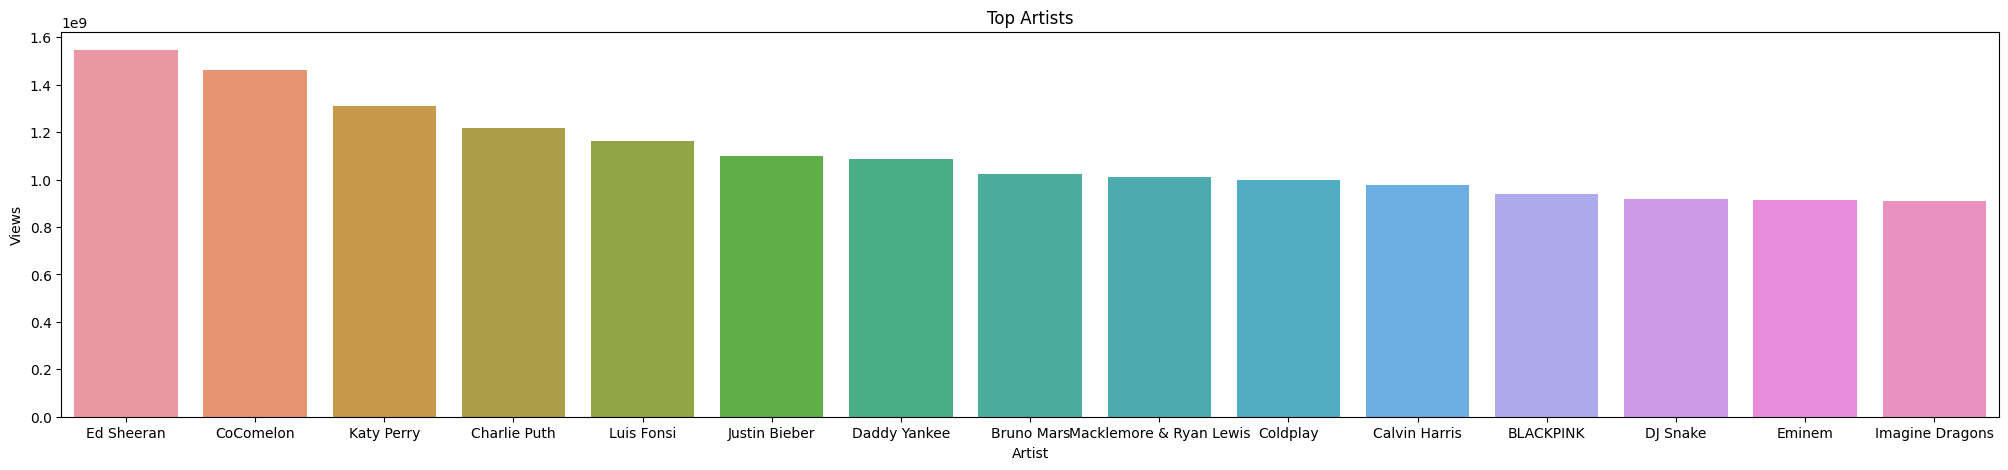

In [566]:
fig, ax = plt.subplots(figsize=(25, 5))
ax = sns.barplot(x=df.groupby('Artist').mean()['Views'].sort_values(ascending=False)[:15].index, 
            y=df.groupby('Artist').mean()['Views'].sort_values(ascending=False)[:15].values)
ax.set(xlabel='Artist', ylabel='Views', title='Top Artists');

I used the most viewed songs to get top artists, was not expecting Ed Sheeran to be the top artists though, no offense but he's not one of my favorites 😞 

# Streaming Trends

<ipython-input-567-da2c304207af>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = sns.barplot(x=df.groupby('Track').mean()['Stream'].sort_values(ascending=False)[:10].index,
<ipython-input-567-da2c304207af>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=df.groupby('Track').mean()['Stream'].sort_values(ascending=False)[:10].values)


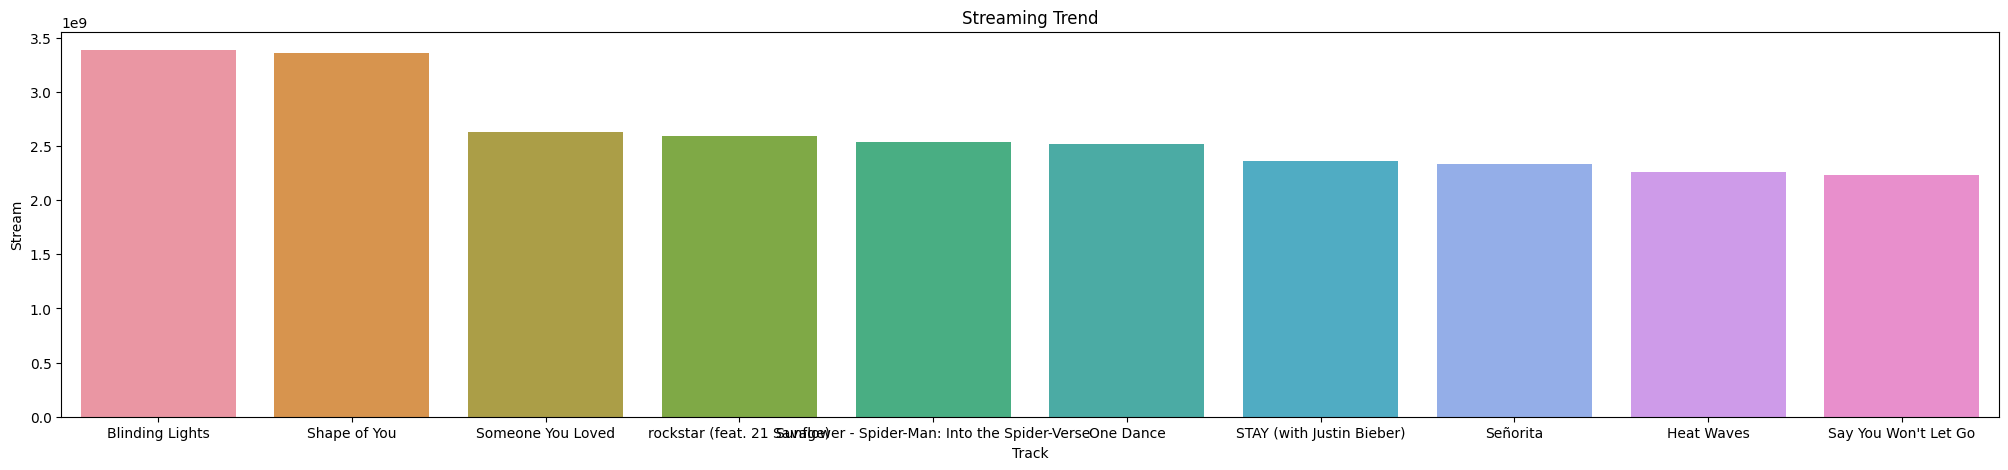

In [567]:
fig, ax = plt.subplots(figsize=(25, 5))
ax = sns.barplot(x=df.groupby('Track').mean()['Stream'].sort_values(ascending=False)[:10].index, 
            y=df.groupby('Track').mean()['Stream'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='Track', ylabel='Stream', title='Streaming Trend');

loll I was actually listening to the weekend rn what are the odds 😶

# Best albums

<ipython-input-568-afe0dd0e43d4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = sns.barplot(x=df.groupby('Album').mean()['Likes'].sort_values(ascending=False)[:10].index,
<ipython-input-568-afe0dd0e43d4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y=df.groupby('Album').mean()['Likes'].sort_values(ascending=False)[:10].values)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYL

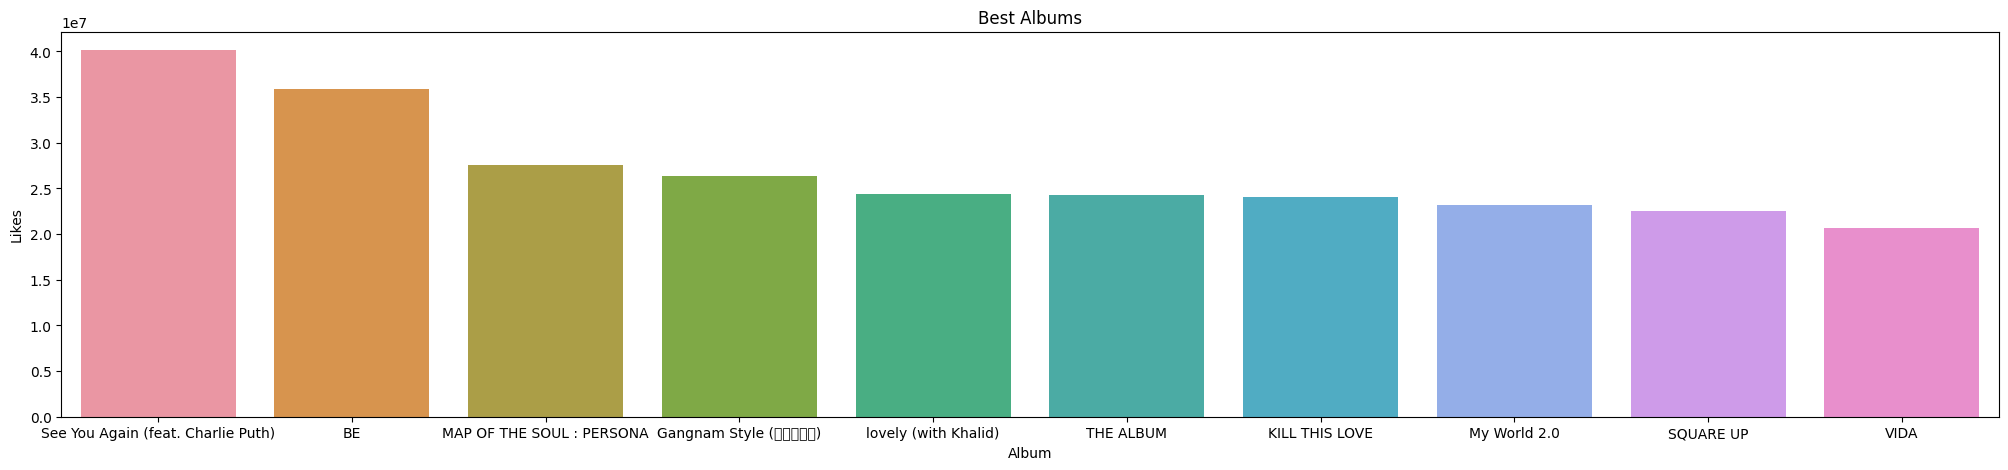

In [568]:
fig, ax = plt.subplots(figsize=(25, 5))
ax = sns.barplot(x=df.groupby('Album').mean()['Likes'].sort_values(ascending=False)[:10].index, 
            y=df.groupby('Album').mean()['Likes'].sort_values(ascending=False)[:10].values)
ax.set(xlabel='Album', ylabel='Likes', title='Best Albums');

# finding patterns in data
or trying at least 🙃

I'll just drop the key column since I'm not familiar with key signatures

In [569]:
df.drop(columns = ['Key','id'],inplace=True)

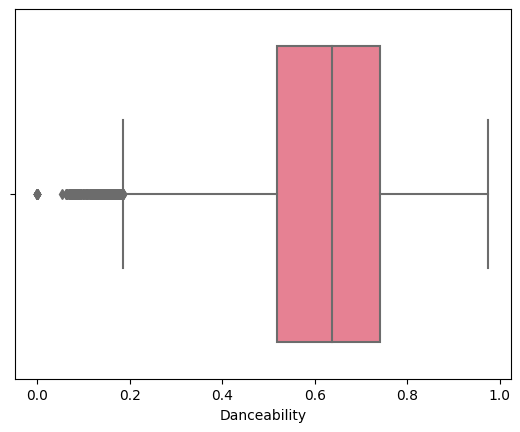

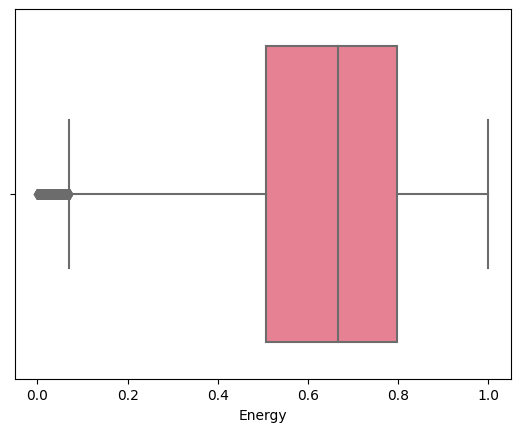

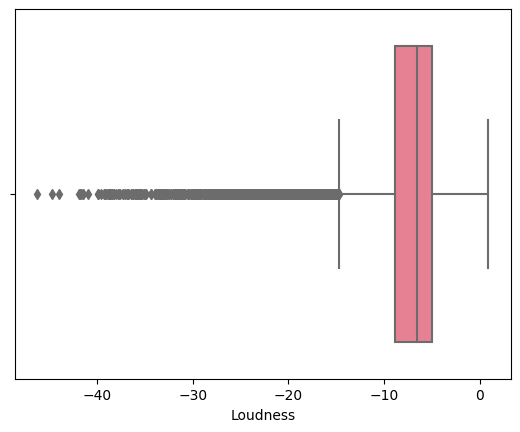

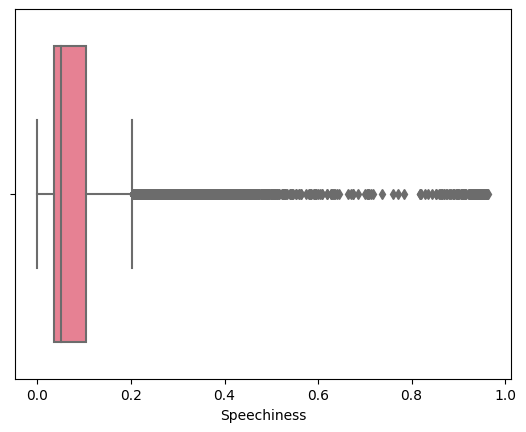

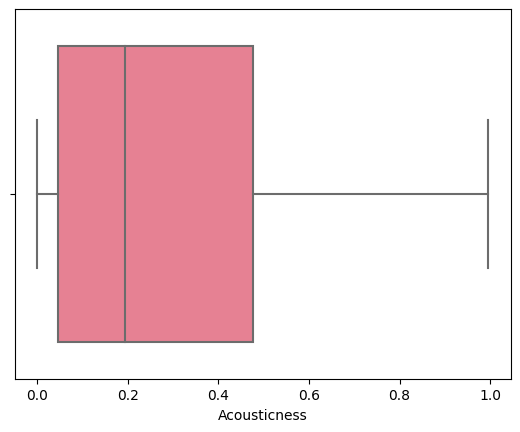

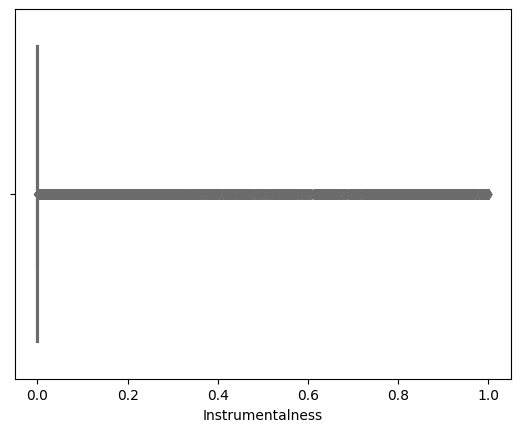

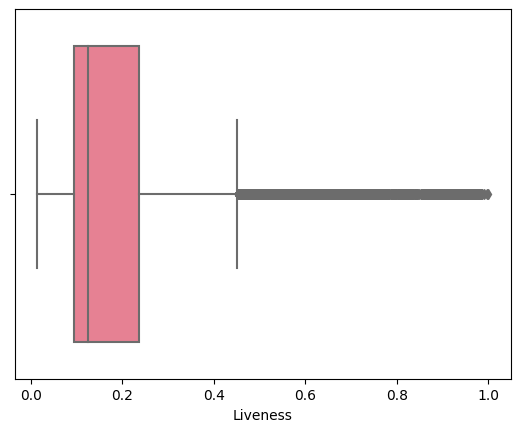

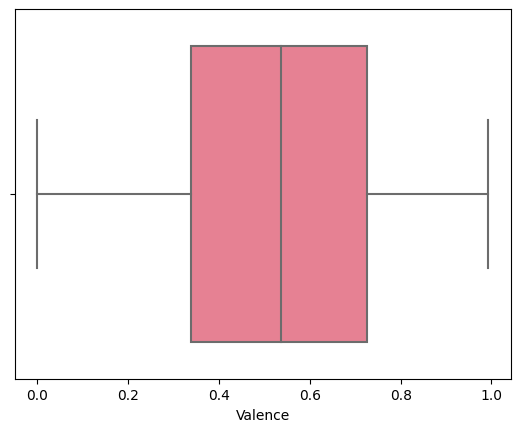

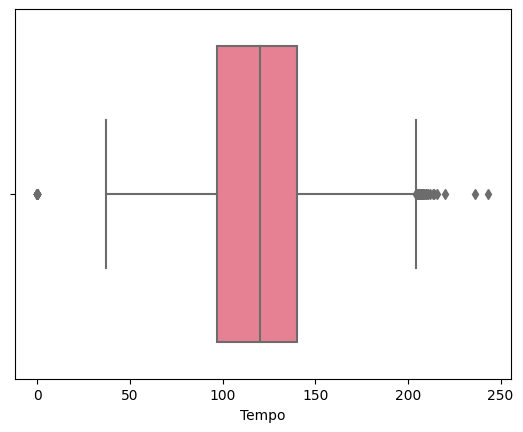

In [570]:
musicdetails = ["Danceability","Energy","Loudness","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo"]
for col in musicdetails:
  sns.boxplot(data = df,x=col)
  plt.show()

I tried to pick some columns that looked similar to each other and get their scatter plot to find any relations

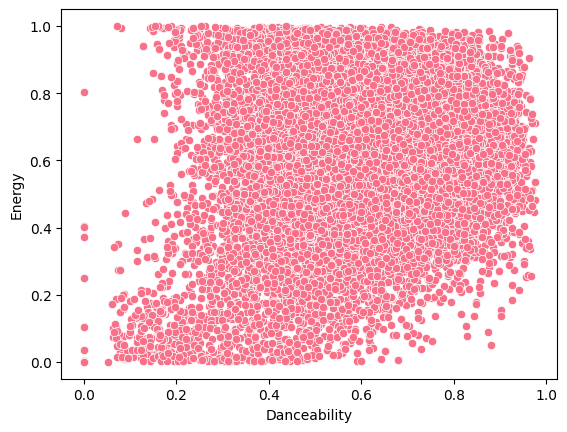

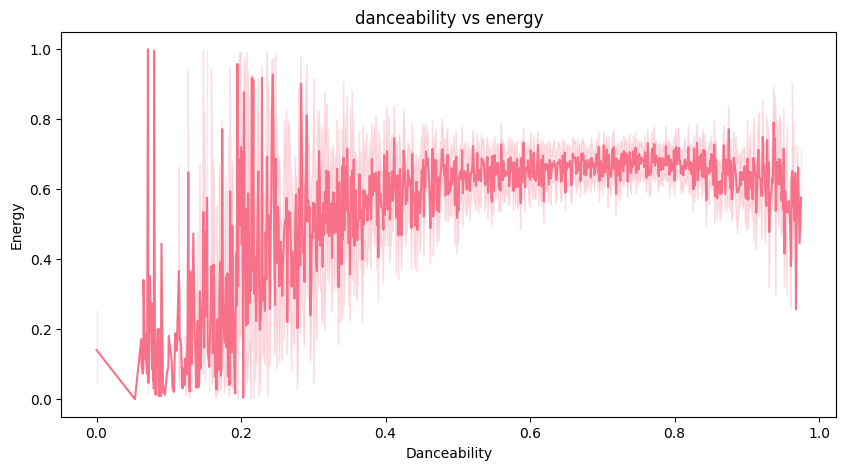

In [571]:
sp = sns.scatterplot(data=df,x=df['Danceability'],y=df['Energy'])
plt.show()
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('danceability vs energy')
sns.lineplot(data=df, x="Danceability", y="Energy");

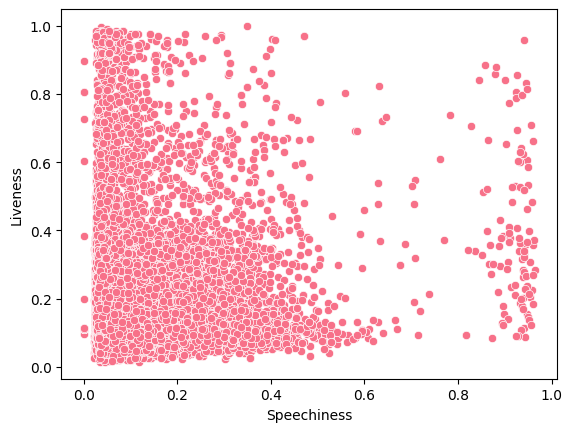

In [572]:
sp = sns.scatterplot(data=df,x=df['Speechiness'],y=df['Liveness'])
plt.show()

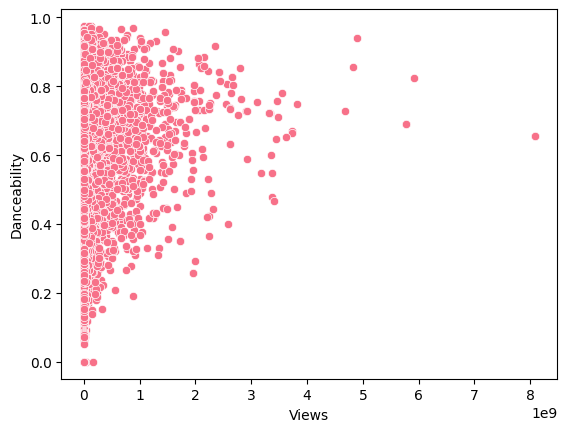

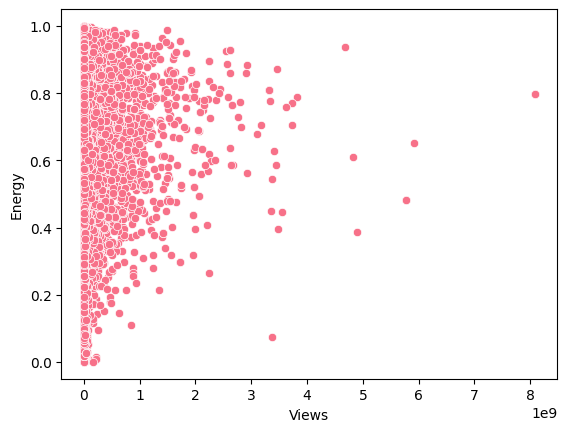

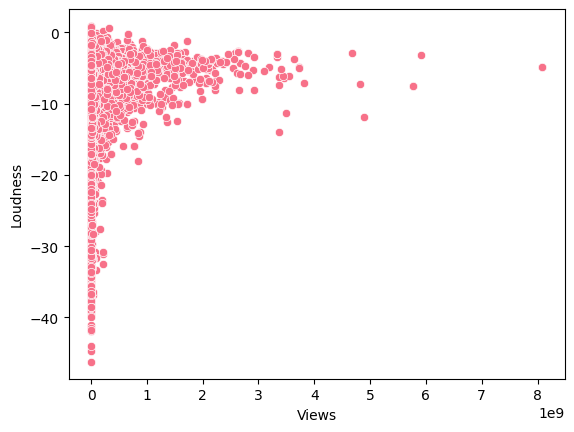

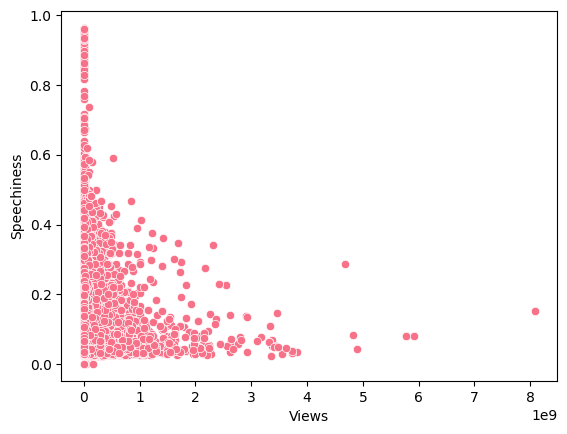

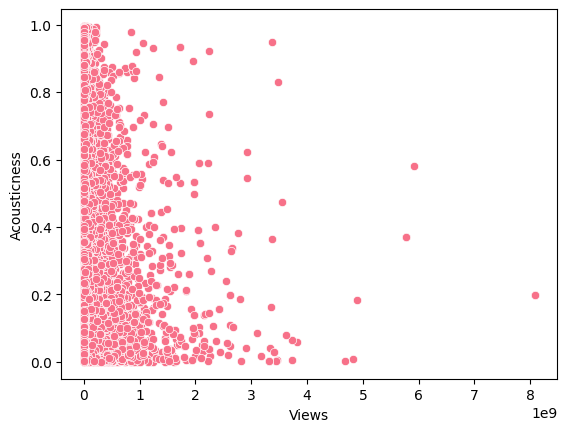

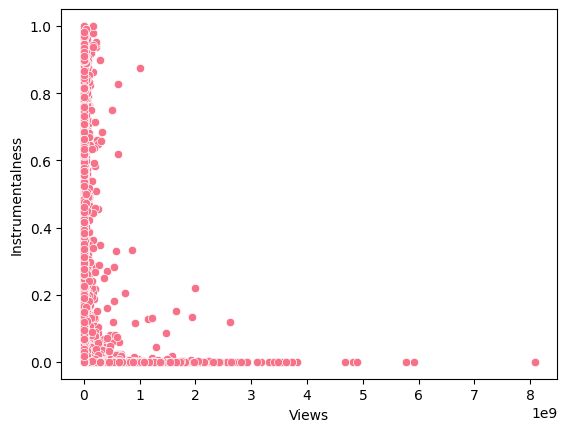

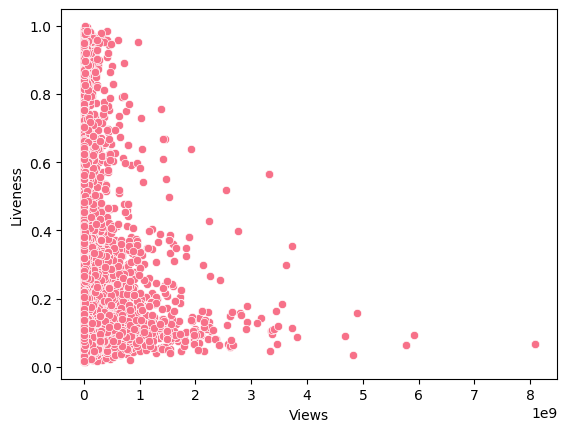

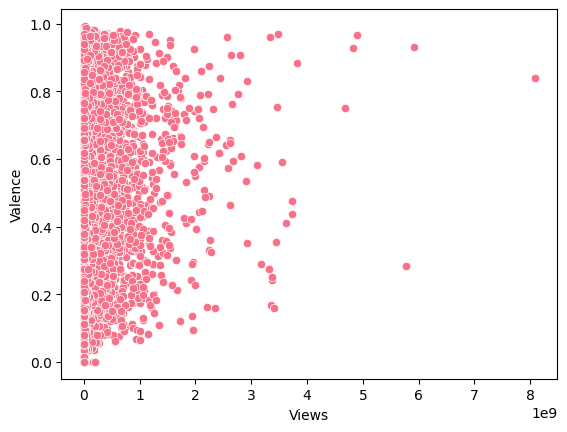

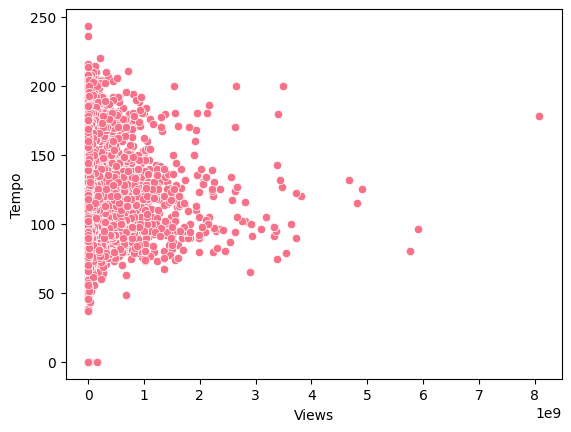

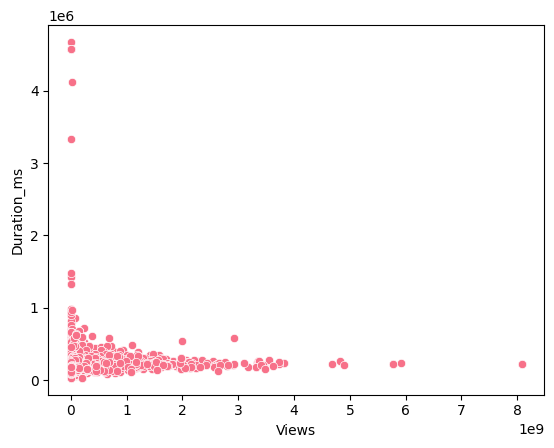

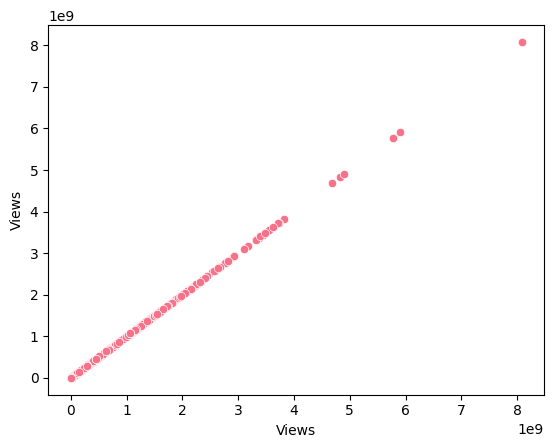

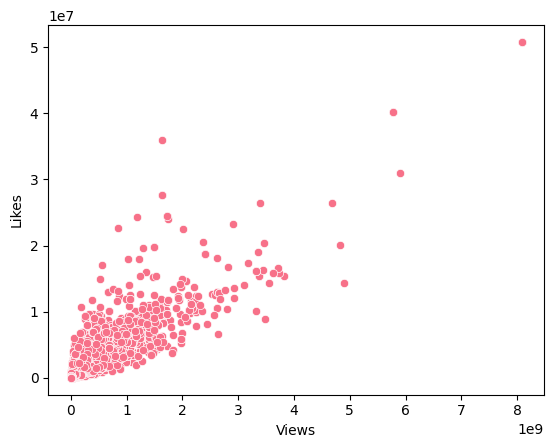

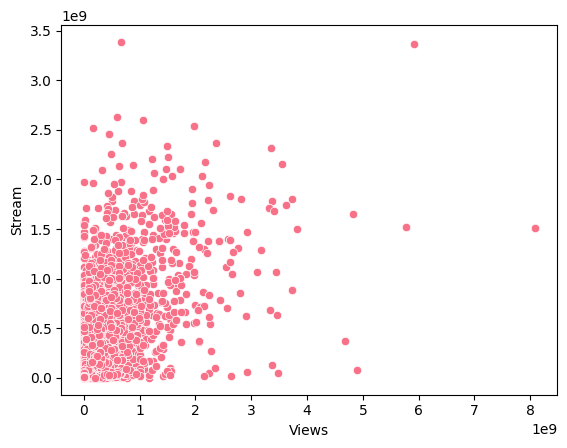

In [573]:
for col in df.columns:
  if df[col].dtype != 'object':
    sb = sns.scatterplot(data=df,x ='Views',y=col)
    plt.show()

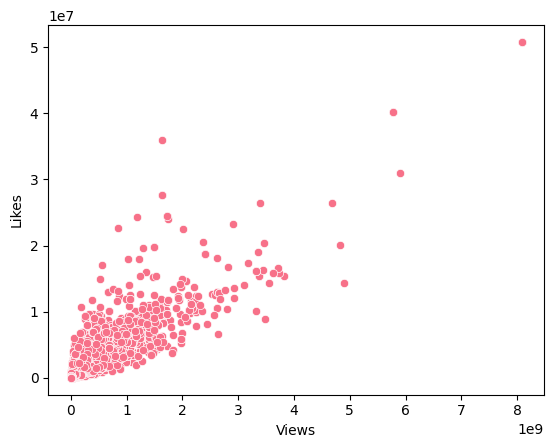

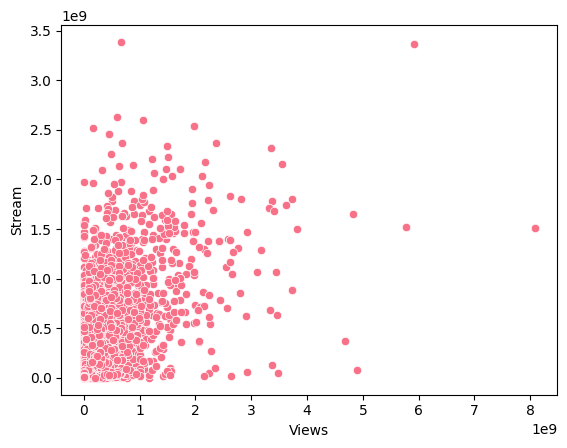

In [574]:
lk_st = ["Likes","Stream"]
for col in lk_st:
  if df[col].dtype != 'object':
    sb = sns.scatterplot(data=df,x ='Views',y=col)
    plt.show()

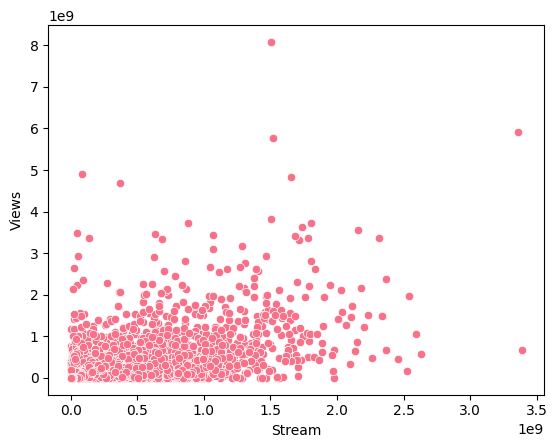

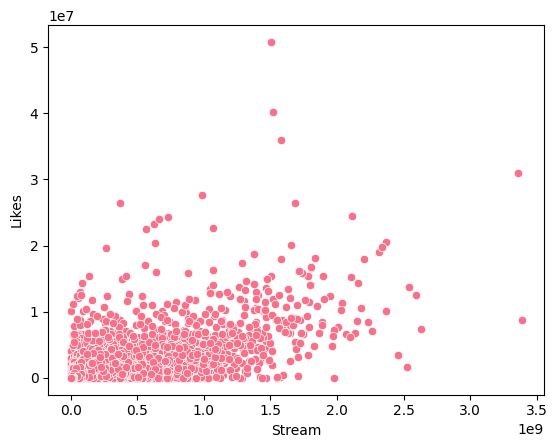

In [575]:
lk_st = ["Views","Likes"]
for col in lk_st:
  if df[col].dtype != 'object':
    sb = sns.scatterplot(data=df,x ='Stream',y=col)
    plt.show()

so I was trying to get any relation or any pattern between two or more columns so that I could get or predict the null values(using Regression) but couldn't find any so I'll try to find another approach

# Another Approach 🪂
so in my mind I would try to make new list called 'trend' for example.
since that I can't quiet predict how many views or likes or streams (logicaly it's something that can't be predicted) so what we can do is find out whether the song is (or could be) trendy or not using the artist and the album it's in. we find a song trendy if singer is popular or it is in a popular album, and by popular I mean that how many views are there in his other tracks 

In [673]:
trendy_df = df[['Artist','Album','Views']]
trendy_df

Artist                                          Album        Views
0         Gorillaz                                     Demon Days  693555221.0
1         Gorillaz                                  Plastic Beach   72011645.0
2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)    8435055.0
3         Gorillaz                                  Plastic Beach  211754952.0
4         Gorillaz                                       Gorillaz  618480958.0
...            ...                                            ...          ...
20713  SICK LEGEND                           JUST DANCE HARDSTYLE      71678.0
20714  SICK LEGEND                 SET FIRE TO THE RAIN HARDSTYLE     164741.0
20715  SICK LEGEND                      OUTSIDE HARDSTYLE SPED UP      35646.0
20716  SICK LEGEND                            ONLY GIRL HARDSTYLE       6533.0
20717  SICK LEGEND                             MISS YOU HARDSTYLE     158697.0

[20716 rows x 3 columns]

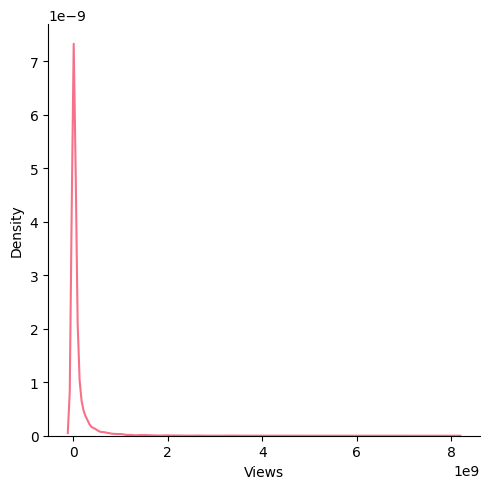

In [674]:
sns.set_palette("husl")
sns.displot(data = trendy_df,x = "Views",kind="kde")

In [675]:
trendy_df.isna().sum()

Artist      0
Album       0
Views     469
dtype: int64

In [676]:
trendy = trendy_df.groupby(['Artist','Album']).mean()['Views']
trendy

Artist    Album                                   
$NOT      - TRAGEDY +                                  9158825.0
          Beautiful Havoc                             14683693.5
          EAT YOUR HEART OUT                            681136.0
          Ethereal                                    10114989.0
          Fast & Furious: Drift Tape (Phonk Vol 1)       76559.0
                                                         ...    
Øneheart  snowfall (Slowed + Reverb)                  15361992.0
          snowfall (Sped Up)                           1707355.0
          this feeling                                  856049.0
          watching the stars                            323775.0
          watching the stars (Remixes)                  139020.0
Name: Views, Length: 14259, dtype: float64

In [677]:
trendy = trendy.reset_index()
trendy

Artist                                     Album       Views
0          $NOT                               - TRAGEDY +   9158825.0
1          $NOT                           Beautiful Havoc  14683693.5
2          $NOT                        EAT YOUR HEART OUT    681136.0
3          $NOT                                  Ethereal  10114989.0
4          $NOT  Fast & Furious: Drift Tape (Phonk Vol 1)     76559.0
...         ...                                       ...         ...
14254  Øneheart                snowfall (Slowed + Reverb)  15361992.0
14255  Øneheart                        snowfall (Sped Up)   1707355.0
14256  Øneheart                              this feeling    856049.0
14257  Øneheart                        watching the stars    323775.0
14258  Øneheart              watching the stars (Remixes)    139020.0

[14259 rows x 3 columns]

In [678]:
trendy_df.fillna(trendy,inplace=True)
trendy_df

<ipython-input-678-7d82a95f53b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trendy_df.fillna(trendy,inplace=True)


Artist                                          Album        Views
0         Gorillaz                                     Demon Days  693555221.0
1         Gorillaz                                  Plastic Beach   72011645.0
2         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)    8435055.0
3         Gorillaz                                  Plastic Beach  211754952.0
4         Gorillaz                                       Gorillaz  618480958.0
...            ...                                            ...          ...
20713  SICK LEGEND                           JUST DANCE HARDSTYLE      71678.0
20714  SICK LEGEND                 SET FIRE TO THE RAIN HARDSTYLE     164741.0
20715  SICK LEGEND                      OUTSIDE HARDSTYLE SPED UP      35646.0
20716  SICK LEGEND                            ONLY GIRL HARDSTYLE       6533.0
20717  SICK LEGEND                             MISS YOU HARDSTYLE     158697.0

[20716 rows x 3 columns]

In [679]:
trendy_df.isna().sum()

Artist      0
Album       0
Views     152
dtype: int64

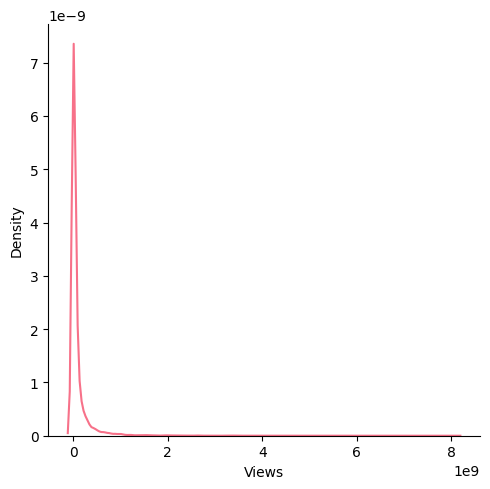

In [680]:
sns.set_palette("husl")
sns.displot(data = trendy_df,x = "Views",kind="kde")

Well I guess that was a succesful approach 😃

In [681]:
df.isna().sum()

id                    0
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Views               469
Likes               540
Licensed            469
official_video      469
Stream              576
dtype: int64

In [682]:
df.update(trendy_df)
df.isna().sum()

id                    0
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Views               152
Likes               540
Licensed            469
official_video      469
Stream              576
dtype: int64

so at this point the 152 other nulls could be just dropped, but i'll drop them from the main dataframe

In [683]:
df.dropna(subset=['Views'],inplace=True)
df.isna().sum()

id                    0
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Views                 0
Likes               388
Licensed            317
official_video      317
Stream              575
dtype: int64

In [634]:
df.T

0                1      \
Artist                  Gorillaz         Gorillaz   
Track             Feel Good Inc.  Rhinestone Eyes   
Album                 Demon Days    Plastic Beach   
Album_type                 album            album   
Danceability               0.818            0.676   
Energy                     0.705            0.703   
Loudness                  -6.679           -5.815   
Speechiness                0.177           0.0302   
Acousticness             0.00836           0.0869   
Instrumentalness         0.00233         0.000687   
Liveness                   0.613           0.0463   
Valence                    0.772            0.852   
Tempo                    138.559           92.761   
Duration_ms             222640.0         200173.0   
Views                693555221.0       72011645.0   
Likes                  6220896.0        1079128.0   
Licensed                    True             True   
official_video              True             True   
Stream              1040234854.0      310083733.0   

                                                          2      \
Artist                                                 Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown)   
Album             New Gold (feat. Tame Impala and Bootie Brown)   
Album_type                                               single   
Danceability                                              0.695   
Energy                                                    0.923   
Loudness                                                  -3.93   
Speechiness                                              0.0522   
Acousticness                                             0.0425   
Instrumentalness                                         0.0469   
Liveness                                                  0.116   
Valence                                                   0.551   
Tempo                                                   108.014   
Duration_ms                                            215150.0   
Views                                                 8435055.0   
Likes                                                  282142.0   
Licensed                                                   True   
official_video                                             True   
Stream                                               63063467.0   

                               3               4            5      \
Artist                      Gorillaz        Gorillaz     Gorillaz   
Track             On Melancholy Hill  Clint Eastwood         DARE   
Album                  Plastic Beach        Gorillaz   Demon Days   
Album_type                     album           album        album   
Danceability                   0.689           0.663         0.76   
Energy                         0.739           0.694        0.891   
Loudness                       -5.81          -8.627       -5.852   
Speechiness                    0.026           0.171       0.0372   
Acousticness                0.000015          0.0253       0.0229   
Instrumentalness               0.509             0.0       0.0869   
Liveness                       0.064          0.0698        0.298   
Valence                        0.578           0.525        0.966   
Tempo                        120.423         167.953      120.264   
Duration_ms                 233867.0        340920.0     245000.0   
Views                    211754952.0     618480958.0  259021161.0   
Likes                      1788577.0       6197318.0    1844658.0   
Licensed                        True            True         True   
official_video                  True            True         True   
Stream                   434663559.0     617259738.0  323850327.0   

                                                              6      \
Artist                                                     Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown) ...   
Album             New Gold (fea

# Linear Regression

In [684]:
df.describe()

id  Danceability        Energy           Key      Loudness  \
count  20564.000000  20564.000000  20564.000000  20564.000000  20564.000000   
mean   10312.991490      0.619877      0.634663      5.305437     -7.684938   
std     5974.336906      0.165487      0.214195      3.576799      4.633267   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5143.750000      0.518000      0.506000      2.000000     -8.880000   
50%    10287.500000      0.638000      0.666000      5.000000     -6.549000   
75%    15473.250000      0.741000      0.797000      8.000000     -4.941750   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20564.000000  20564.000000      20564.000000  20564.000000   
mean       0.096442      0.290701          0.056188      0.192218   
std        0.112140      0.286464          0.193591      0.166380   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035600      0.044675          0.000000      0.094000   
50%        0.050400      0.191000          0.000003      0.125000   
75%        0.103000      0.476000          0.000484      0.235000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  20564.000000  20564.000000  2.056400e+04  2.056400e+04  2.017600e+04   
mean       0.529495    120.592462  2.248025e+05  9.402191e+07  6.633658e+05   
std        0.245722     29.587392  1.249870e+05  2.738587e+08  1.789365e+06   
min        0.000000      0.000000  3.098500e+04  0.000000e+00  0.000000e+00   
25%        0.339000     96.993000  1.802670e+05  1.837716e+06  2.157500e+04   
50%        0.537000    119.960500  2.134330e+05  1.457482e+07  1.244745e+05   
75%        0.727000    139.931000  2.524708e+05  7.056464e+07  5.221765e+05   
max        0.993000    243.372000  4.676058e+06  8.079649e+09  5.078865e+07   

             Stream  
count  1.998900e+04  
mean   1.361291e+08  
std    2.447795e+08  
min    6.574000e+03  
25%    1.764355e+07  
50%    4.956860e+07  
75%    1.383497e+08  
max    3.386520e+09

so no much difference was made in the views just small things so we are good to go

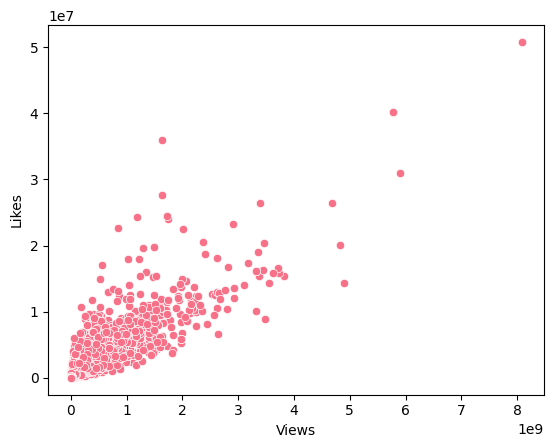

In [636]:
sb = sns.scatterplot(data=df,x ='Views',y='Likes')
plt.show()

In [637]:
df.corr()['Likes']

<ipython-input-637-09831ed358bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Likes']


Danceability        0.098949
Energy              0.062196
Loudness            0.123010
Speechiness         0.007468
Acousticness       -0.078325
Instrumentalness   -0.078082
Liveness           -0.022515
Valence             0.012291
Tempo               0.003890
Duration_ms         0.006016
Views               0.892066
Likes               1.000000
Stream              0.650078
Name: Likes, dtype: float64

In [685]:
vl = df[['Views','Likes']].dropna()

In [686]:
vl

Views      Likes
0      693555221.0  6220896.0
1       72011645.0  1079128.0
2        8435055.0   282142.0
3      211754952.0  1788577.0
4      618480958.0  6197318.0
...            ...        ...
20713      71678.0     1113.0
20714     164741.0     2019.0
20715      35646.0      329.0
20716       6533.0       88.0
20717     158697.0     2484.0

[20176 rows x 2 columns]

In [687]:
X = vl.iloc[:,0].values
X

array([6.94e+08, 7.20e+07, 8.44e+06, ..., 3.56e+04, 6.53e+03, 1.59e+05])

In [688]:
y = vl.iloc[:,1].values
y

array([6.22e+06, 1.08e+06, 2.82e+05, ..., 3.29e+02, 8.80e+01, 2.48e+03])

In [689]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [690]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
regressor.fit(X_train, y_train)

LinearRegression()

In [691]:
y_pred = regressor.predict(X_test)

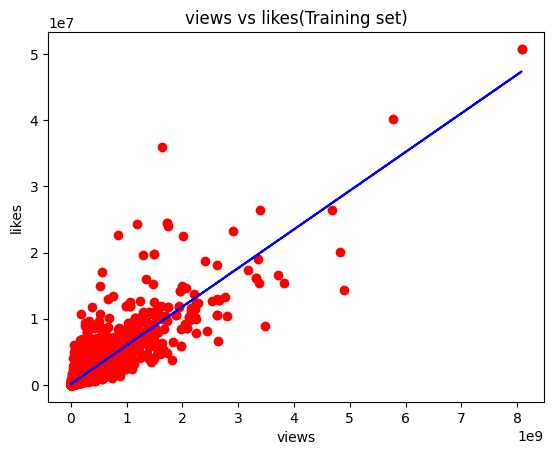

In [645]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('views vs likes(Training set)')
plt.xlabel('views')
plt.ylabel('likes')
plt.show()

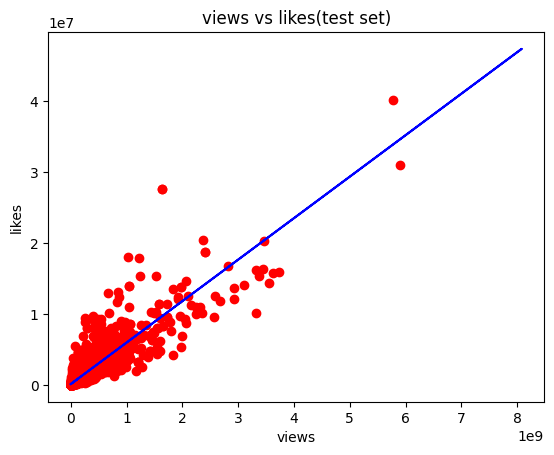

In [651]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('views vs likes(test set)')
plt.xlabel('views')
plt.ylabel('likes')
plt.show()

In [692]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7955994691612276

so we used linear regression on views and likes which turned out quiet good which resulted in a score of 79% which is not bad

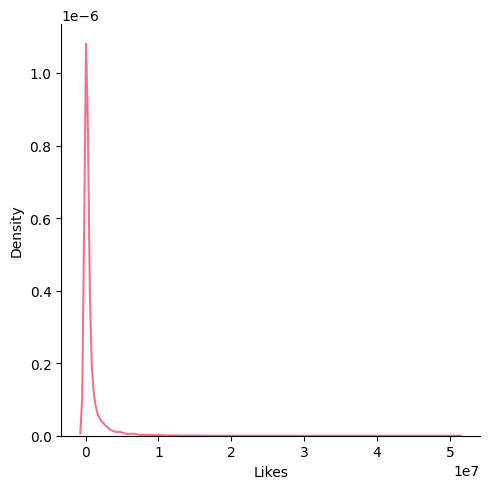

In [657]:
sns.set_palette("husl")
sns.displot(data = df,x = "Likes",kind="kde")

In [693]:
views = df.query('Likes.isnull()')['Views']
views = views.reset_index()
xviews = views.iloc[:,1].values
xviews = xviews.reshape(-1,1)

In [694]:
y_pred = regressor.predict(xviews)
df.loc[df['Likes'].isna(), 'Likes'] = y_pred

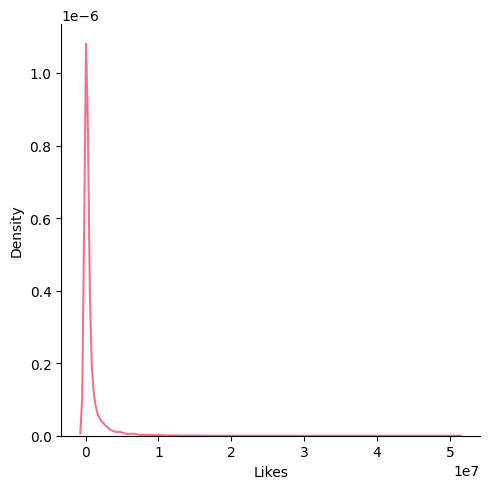

In [695]:
sns.set_palette("husl")
sns.displot(data = df,x = "Likes",kind="kde")

In [696]:
df.isna().sum()

id                    0
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Views                 0
Likes                 0
Licensed            317
official_video      317
Stream              575
dtype: int64

In [697]:
df.describe()

id  Danceability        Energy           Key      Loudness  \
count  20564.000000  20564.000000  20564.000000  20564.000000  20564.000000   
mean   10312.991490      0.619877      0.634663      5.305437     -7.684938   
std     5974.336906      0.165487      0.214195      3.576799      4.633267   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5143.750000      0.518000      0.506000      2.000000     -8.880000   
50%    10287.500000      0.638000      0.666000      5.000000     -6.549000   
75%    15473.250000      0.741000      0.797000      8.000000     -4.941750   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20564.000000  20564.000000      20564.000000  20564.000000   
mean       0.096442      0.290701          0.056188      0.192218   
std        0.112140      0.286464          0.193591      0.166380   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035600      0.044675          0.000000      0.094000   
50%        0.050400      0.191000          0.000003      0.125000   
75%        0.103000      0.476000          0.000484      0.235000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  20564.000000  20564.000000  2.056400e+04  2.056400e+04  2.056400e+04   
mean       0.529495    120.592462  2.248025e+05  9.402191e+07  6.624016e+05   
std        0.245722     29.587392  1.249870e+05  2.738587e+08  1.779876e+06   
min        0.000000      0.000000  3.098500e+04  0.000000e+00  0.000000e+00   
25%        0.339000     96.993000  1.802670e+05  1.837716e+06  2.248450e+04   
50%        0.537000    119.960500  2.134330e+05  1.457482e+07  1.275100e+05   
75%        0.727000    139.931000  2.524708e+05  7.056464e+07  5.219572e+05   
max        0.993000    243.372000  4.676058e+06  8.079649e+09  5.078865e+07   

             Stream  
count  1.998900e+04  
mean   1.361291e+08  
std    2.447795e+08  
min    6.574000e+03  
25%    1.764355e+07  
50%    4.956860e+07  
75%    1.383497e+08  
max    3.386520e+09

every time I modify the data I compare the 'describe' tables to see if anything went overbored, but uptill now every thing is going well as there isn't much difference between this table and the first one as we started 😃

# Multiple Linear Rgression
so we could use multiple linear regression to make model that would predict the streams.
sooo this part turned out to be not as successfull as I thought it would be, I tried different columns with the data but the best score I reached was 39% score, so the Streams was not somethig to be predicted by sond features. sadly I kept the nulls in the Stream column untouched 😞 

In [700]:
df.columns

Index(['id', 'Artist', 'Track', 'Album', 'Album_type', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Views', 'Likes', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [701]:
music = df[['Danceability', 'Energy','Loudness','Valence', 'Tempo', 'Views', 'Stream']]
music

Danceability  Energy  Loudness  Valence    Tempo        Views  \
0             0.818   0.705    -6.679   0.7720  138.559  693555221.0   
1             0.676   0.703    -5.815   0.8520   92.761   72011645.0   
2             0.695   0.923    -3.930   0.5510  108.014    8435055.0   
3             0.689   0.739    -5.810   0.5780  120.423  211754952.0   
4             0.663   0.694    -8.627   0.5250  167.953  618480958.0   
...             ...     ...       ...      ...      ...          ...   
20713         0.582   0.926    -6.344   0.6580   90.002      71678.0   
20714         0.531   0.936    -1.786   0.6570  174.869     164741.0   
20715         0.443   0.830    -4.679   0.4190  168.388      35646.0   
20716         0.417   0.767    -4.004   0.5390  155.378       6533.0   
20717         0.498   0.938    -4.543   0.0787  160.067     158697.0   

             Stream  
0      1.040235e+09  
1      3.100837e+08  
2      6.306347e+07  
3      4.346636e+08  
4      6.172597e+08  
...             ...  
20713  9.227144e+06  
20714  1.089818e+07  
20715  6.226110e+06  
20716  6.873961e+06  
20717  5.695584e+06  

[20564 rows x 7 columns]

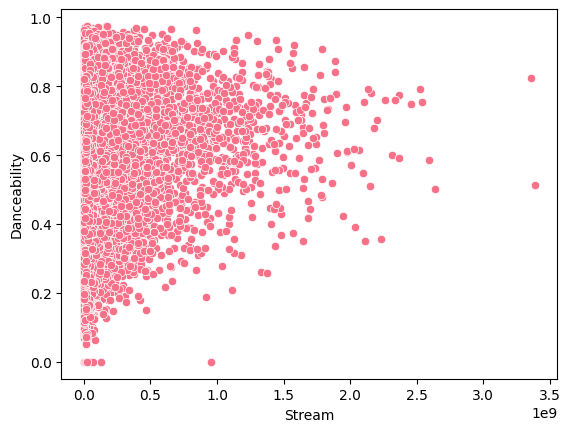

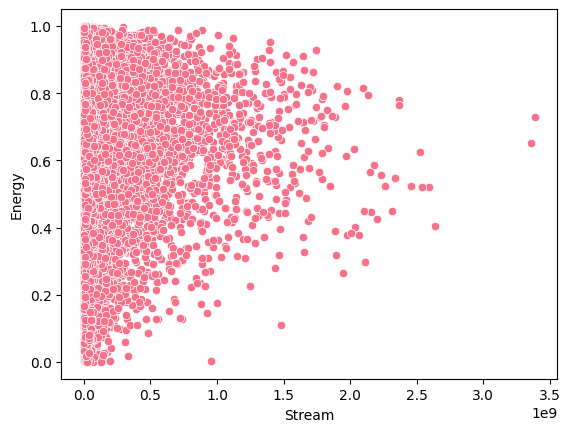

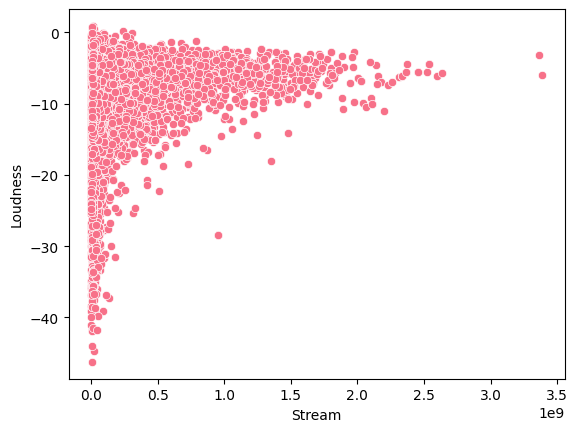

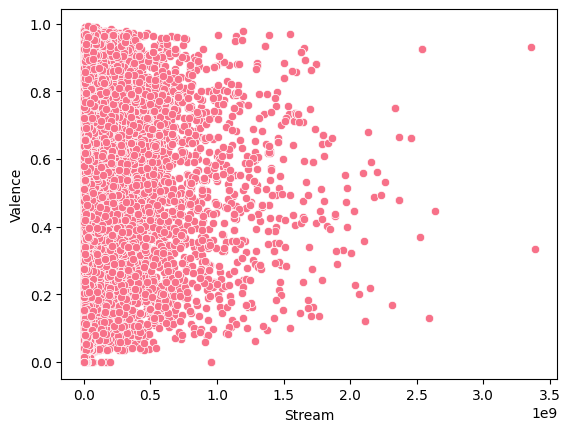

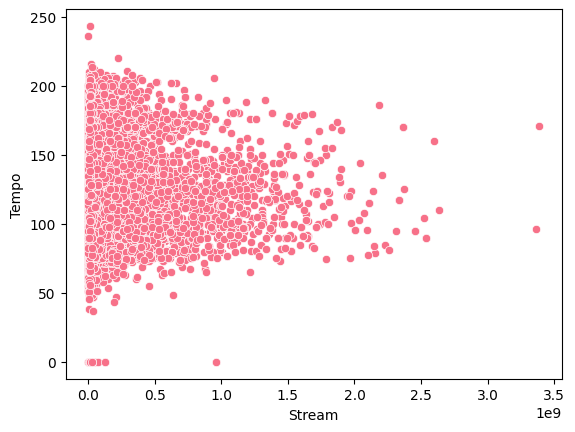

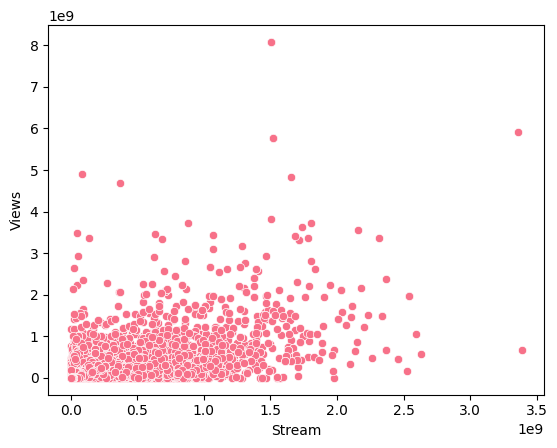

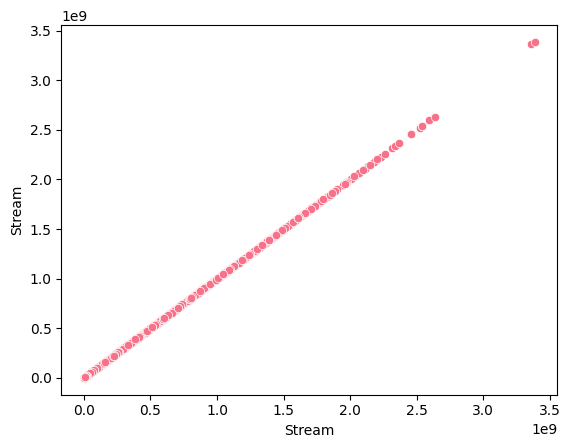

In [702]:
for col in music:
  sb = sns.scatterplot(data=music,x ='Stream',y=col)
  plt.show()

In [703]:
music.dropna(inplace=True)

<ipython-input-703-8c52a6fa6a97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music.dropna(inplace=True)


In [704]:
X = music.iloc[:, :-1].values
y = music.iloc[:, -1].values

In [705]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [706]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [707]:
y_pred = regressor.predict(X_test)

In [708]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.39372081976486606

now for the following part I thought of two ways to get the licensed and the official_video columns, although I'm not sure if they're gonna work or not but I'll try. so I thought of tree classification or logistic regression

#Tree Classifier for Licensed

In [709]:
df.T

0                1      \
id                             0                1   
Artist                  Gorillaz         Gorillaz   
Track             Feel Good Inc.  Rhinestone Eyes   
Album                 Demon Days    Plastic Beach   
Album_type                 album            album   
Danceability               0.818            0.676   
Energy                     0.705            0.703   
Key                          6.0              8.0   
Loudness                  -6.679           -5.815   
Speechiness                0.177           0.0302   
Acousticness             0.00836           0.0869   
Instrumentalness         0.00233         0.000687   
Liveness                   0.613           0.0463   
Valence                    0.772            0.852   
Tempo                    138.559           92.761   
Duration_ms             222640.0         200173.0   
Views                693555221.0       72011645.0   
Likes                  6220896.0        1079128.0   
Licensed                    True             True   
official_video              True             True   
Stream              1040234854.0      310083733.0   

                                                          2      \
id                                                            2   
Artist                                                 Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown)   
Album             New Gold (feat. Tame Impala and Bootie Brown)   
Album_type                                               single   
Danceability                                              0.695   
Energy                                                    0.923   
Key                                                         1.0   
Loudness                                                  -3.93   
Speechiness                                              0.0522   
Acousticness                                             0.0425   
Instrumentalness                                         0.0469   
Liveness                                                  0.116   
Valence                                                   0.551   
Tempo                                                   108.014   
Duration_ms                                            215150.0   
Views                                                 8435055.0   
Likes                                                  282142.0   
Licensed                                                   True   
official_video                                             True   
Stream                                               63063467.0   

                               3               4            5      \
id                                 3               4            5   
Artist                      Gorillaz        Gorillaz     Gorillaz   
Track             On Melancholy Hill  Clint Eastwood         DARE   
Album                  Plastic Beach        Gorillaz   Demon Days   
Album_type                     album           album        album   
Danceability                   0.689           0.663         0.76   
Energy                         0.739           0.694        0.891   
Key                              2.0            10.0         11.0   
Loudness                       -5.81          -8.627       -5.852   
Speechiness                    0.026           0.171       0.0372   
Acousticness                0.000015          0.0253       0.0229   
Instrumentalness               0.509             0.0       0.0869   
Liveness                       0.064          0.0698        0.298   
Valence                        0.578           0.525        0.966   
Tempo                        120.423         167.953      120.264   
Duration_ms                 233867.0        340920.0     245000.0   
Views                    211754952.0     618480958.0  259021161.0   
Likes                      1788577.0       6197318.0    1844658.0   
Licensed                        True            True         True   
offic

In [710]:
df.isna().sum()

id                    0
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Views                 0
Likes                 0
Licensed            317
official_video      317
Stream              575
dtype: int64

In [711]:
df.dtypes

id                    int64
Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Licensed             object
official_video       object
Stream              float64
dtype: object

In [712]:
binary_cat = ['Album_type','Licensed','official_video']

for cat in binary_cat:
  print(cat, df[cat].unique())
  print()

Album_type ['album' 'single' 'compilation']

Licensed [True False nan]

official_video [True False nan]



In [713]:
for col in binary_cat:
  if df[col].dtypes == object:
    df[col] = LabelEncoder().fit_transform(df[col])
df.T

0                1      \
id                             0                1   
Artist                  Gorillaz         Gorillaz   
Track             Feel Good Inc.  Rhinestone Eyes   
Album                 Demon Days    Plastic Beach   
Album_type                     0                0   
Danceability               0.818            0.676   
Energy                     0.705            0.703   
Key                          6.0              8.0   
Loudness                  -6.679           -5.815   
Speechiness                0.177           0.0302   
Acousticness             0.00836           0.0869   
Instrumentalness         0.00233         0.000687   
Liveness                   0.613           0.0463   
Valence                    0.772            0.852   
Tempo                    138.559           92.761   
Duration_ms             222640.0         200173.0   
Views                693555221.0       72011645.0   
Likes                  6220896.0        1079128.0   
Licensed                       1                1   
official_video                 1                1   
Stream              1040234854.0      310083733.0   

                                                          2      \
id                                                            2   
Artist                                                 Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown)   
Album             New Gold (feat. Tame Impala and Bootie Brown)   
Album_type                                                    2   
Danceability                                              0.695   
Energy                                                    0.923   
Key                                                         1.0   
Loudness                                                  -3.93   
Speechiness                                              0.0522   
Acousticness                                             0.0425   
Instrumentalness                                         0.0469   
Liveness                                                  0.116   
Valence                                                   0.551   
Tempo                                                   108.014   
Duration_ms                                            215150.0   
Views                                                 8435055.0   
Likes                                                  282142.0   
Licensed                                                      1   
official_video                                                1   
Stream                                               63063467.0   

                               3               4            5      \
id                                 3               4            5   
Artist                      Gorillaz        Gorillaz     Gorillaz   
Track             On Melancholy Hill  Clint Eastwood         DARE   
Album                  Plastic Beach        Gorillaz   Demon Days   
Album_type                         0               0            0   
Danceability                   0.689           0.663         0.76   
Energy                         0.739           0.694        0.891   
Key                              2.0            10.0         11.0   
Loudness                       -5.81          -8.627       -5.852   
Speechiness                    0.026           0.171       0.0372   
Acousticness                0.000015          0.0253       0.0229   
Instrumentalness               0.509             0.0       0.0869   
Liveness                       0.064          0.0698        0.298   
Valence                        0.578           0.525        0.966   
Tempo                        120.423         167.953      120.264   
Duration_ms                 233867.0        340920.0     245000.0   
Views                    211754952.0     618480958.0  259021161.0   
Likes                      1788577.0       6197318.0    1844658.0   
Licensed                           1               1            1   
offic

In [714]:
for cat in binary_cat:
  print(cat, df[cat].unique())
  print()

Album_type [0 2 1]

Licensed [1 0 2]

official_video [1 0 2]



In [715]:
df.dtypes

id                    int64
Artist               object
Track                object
Album                object
Album_type            int64
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Licensed              int64
official_video        int64
Stream              float64
dtype: object

In [716]:
nullfree_df = df.drop(['Artist','Track','Album','Stream','official_video'],axis=1)
nullfree_df = nullfree_df[nullfree_df.Licensed < 2]
X = nullfree_df.drop(columns = ['Licensed'])
y = nullfree_df['Licensed'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

I removed all object values as well as the streams since it has nulls, I also removed the official_video columns because it makes the classification biased which makes the licensed true if and only if the official_video is also true, and when we gonna predict the null values for the Licensed, the official_video will also be nulls, so it won't help us in our model.

In [717]:
np.unique(y)

array([0, 1])

In [718]:
# Train and fit the model
dt_clf = DecisionTreeClassifier(max_depth = 4)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [719]:
dt_pred = dt_clf.predict(X_test)
np.unique(dt_pred)

array([0, 1])

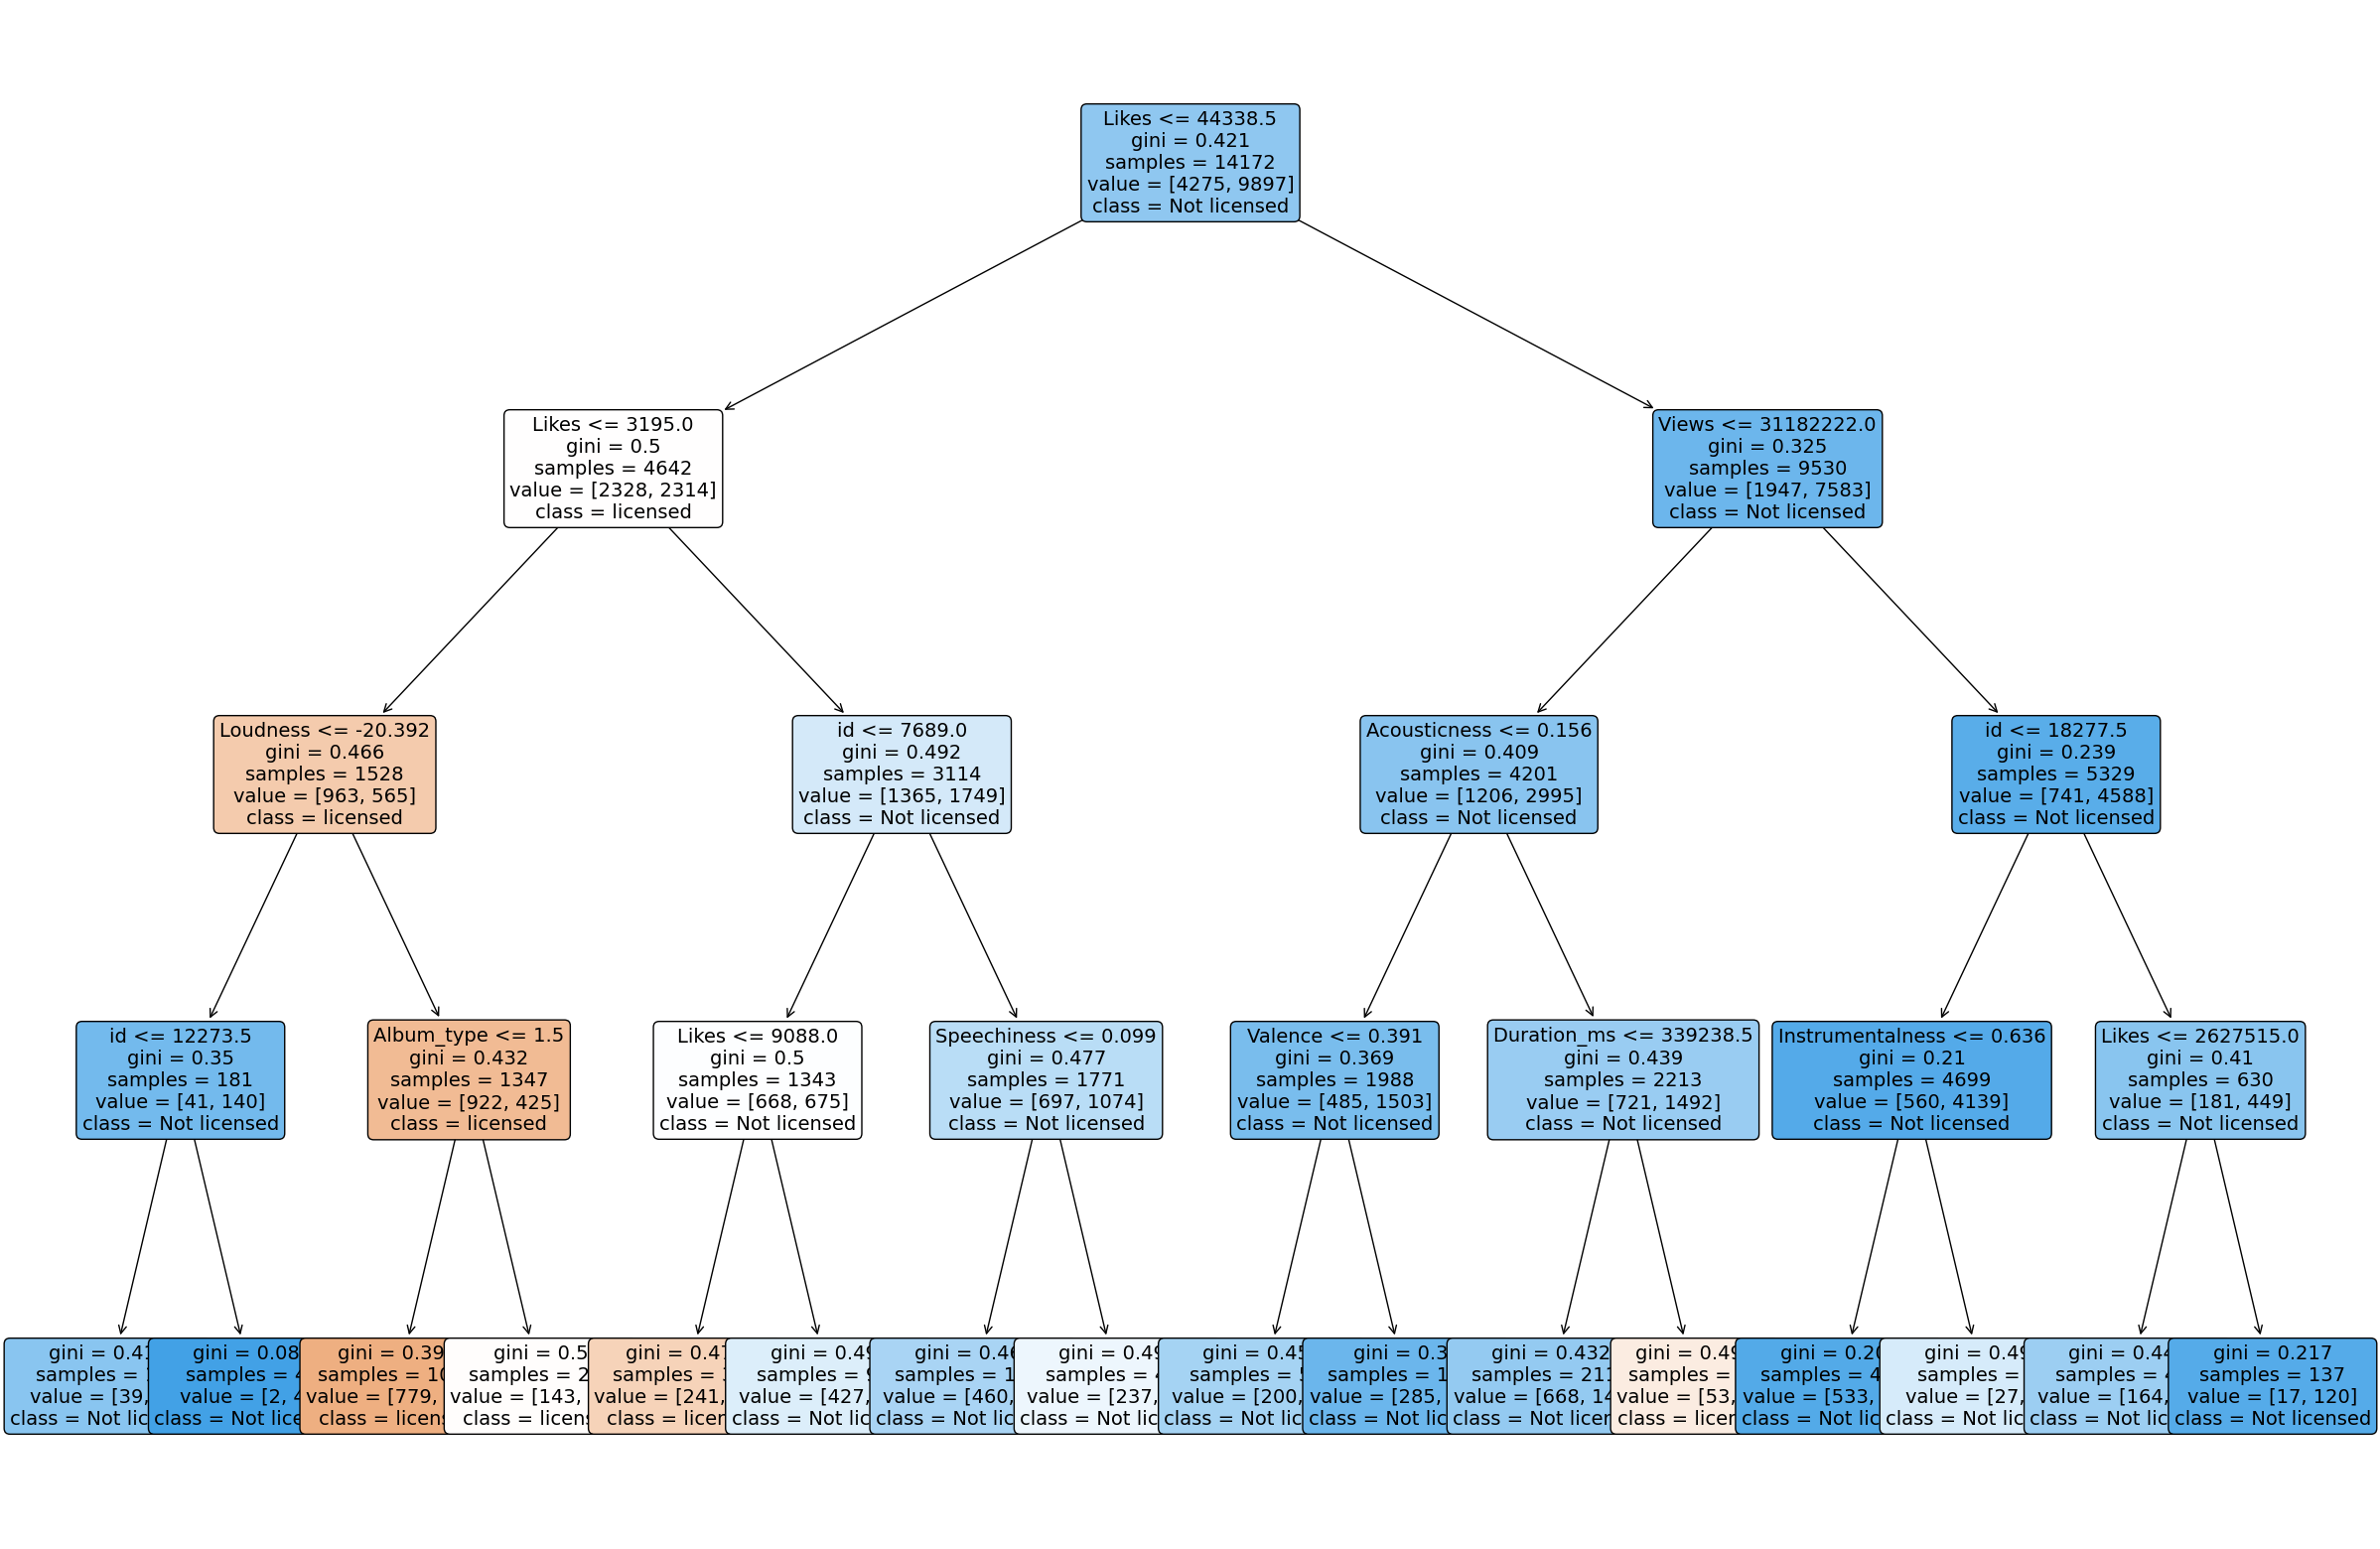

In [720]:
#plt the figure, setting a black background
plt.figure(figsize=(30,20), facecolor ='white')
#create the tree plot
a = tree.plot_tree(dt_clf,
                   #use the feature names stored
                   feature_names = X.columns,
                   #use the class names stored
                   class_names = ['licensed', 'Not licensed'],
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [721]:
from sklearn import metrics
print(metrics.classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.29      0.63      0.40       844
           1       0.93      0.75      0.83      5231

    accuracy                           0.73      6075
   macro avg       0.61      0.69      0.61      6075
weighted avg       0.84      0.73      0.77      6075



now we can fill our null values using the model we made

In [722]:
df.T

0                1      \
id                             0                1   
Artist                  Gorillaz         Gorillaz   
Track             Feel Good Inc.  Rhinestone Eyes   
Album                 Demon Days    Plastic Beach   
Album_type                     0                0   
Danceability               0.818            0.676   
Energy                     0.705            0.703   
Key                          6.0              8.0   
Loudness                  -6.679           -5.815   
Speechiness                0.177           0.0302   
Acousticness             0.00836           0.0869   
Instrumentalness         0.00233         0.000687   
Liveness                   0.613           0.0463   
Valence                    0.772            0.852   
Tempo                    138.559           92.761   
Duration_ms             222640.0         200173.0   
Views                693555221.0       72011645.0   
Likes                  6220896.0        1079128.0   
Licensed                       1                1   
official_video                 1                1   
Stream              1040234854.0      310083733.0   

                                                          2      \
id                                                            2   
Artist                                                 Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown)   
Album             New Gold (feat. Tame Impala and Bootie Brown)   
Album_type                                                    2   
Danceability                                              0.695   
Energy                                                    0.923   
Key                                                         1.0   
Loudness                                                  -3.93   
Speechiness                                              0.0522   
Acousticness                                             0.0425   
Instrumentalness                                         0.0469   
Liveness                                                  0.116   
Valence                                                   0.551   
Tempo                                                   108.014   
Duration_ms                                            215150.0   
Views                                                 8435055.0   
Likes                                                  282142.0   
Licensed                                                      1   
official_video                                                1   
Stream                                               63063467.0   

                               3               4            5      \
id                                 3               4            5   
Artist                      Gorillaz        Gorillaz     Gorillaz   
Track             On Melancholy Hill  Clint Eastwood         DARE   
Album                  Plastic Beach        Gorillaz   Demon Days   
Album_type                         0               0            0   
Danceability                   0.689           0.663         0.76   
Energy                         0.739           0.694        0.891   
Key                              2.0            10.0         11.0   
Loudness                       -5.81          -8.627       -5.852   
Speechiness                    0.026           0.171       0.0372   
Acousticness                0.000015          0.0253       0.0229   
Instrumentalness               0.509             0.0       0.0869   
Liveness                       0.064          0.0698        0.298   
Valence                        0.578           0.525        0.966   
Tempo                        120.423         167.953      120.264   
Duration_ms                 233867.0        340920.0     245000.0   
Views                    211754952.0     618480958.0  259021161.0   
Likes                      1788577.0       6197318.0    1844658.0   
Licensed                           1               1            1   
offic

In [723]:
classify = df.query("Licensed == 2")
X = classify.drop(['Artist','Track','Album','Stream','official_video','Licensed'],axis=1)

In [724]:
licensed_pred = dt_clf.predict(X)
licensed_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [725]:
df.loc[df['Licensed'] == 2, 'Licensed'] = licensed_pred

# Tree classification for official_video
I'll just do the same for the official_video column, u can skip this one since it is the same as the top one

In [380]:
nullfree_df = df.drop(['Artist','Track','Album','Stream','Licensed'],axis=1)
nullfree_df = nullfree_df[nullfree_df.official_video < 2]
X = nullfree_df.drop(columns = ['official_video'])
y = nullfree_df['official_video'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [381]:
np.unique(y)

array([0, 1])

In [382]:
# Train and fit the model
dt_clf = DecisionTreeClassifier(max_depth = 4)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [383]:
dt_pred = dt_clf.predict(X_test)
np.unique(dt_pred)

array([0, 1])

since the licensed and official_video are similar so they have similar trees

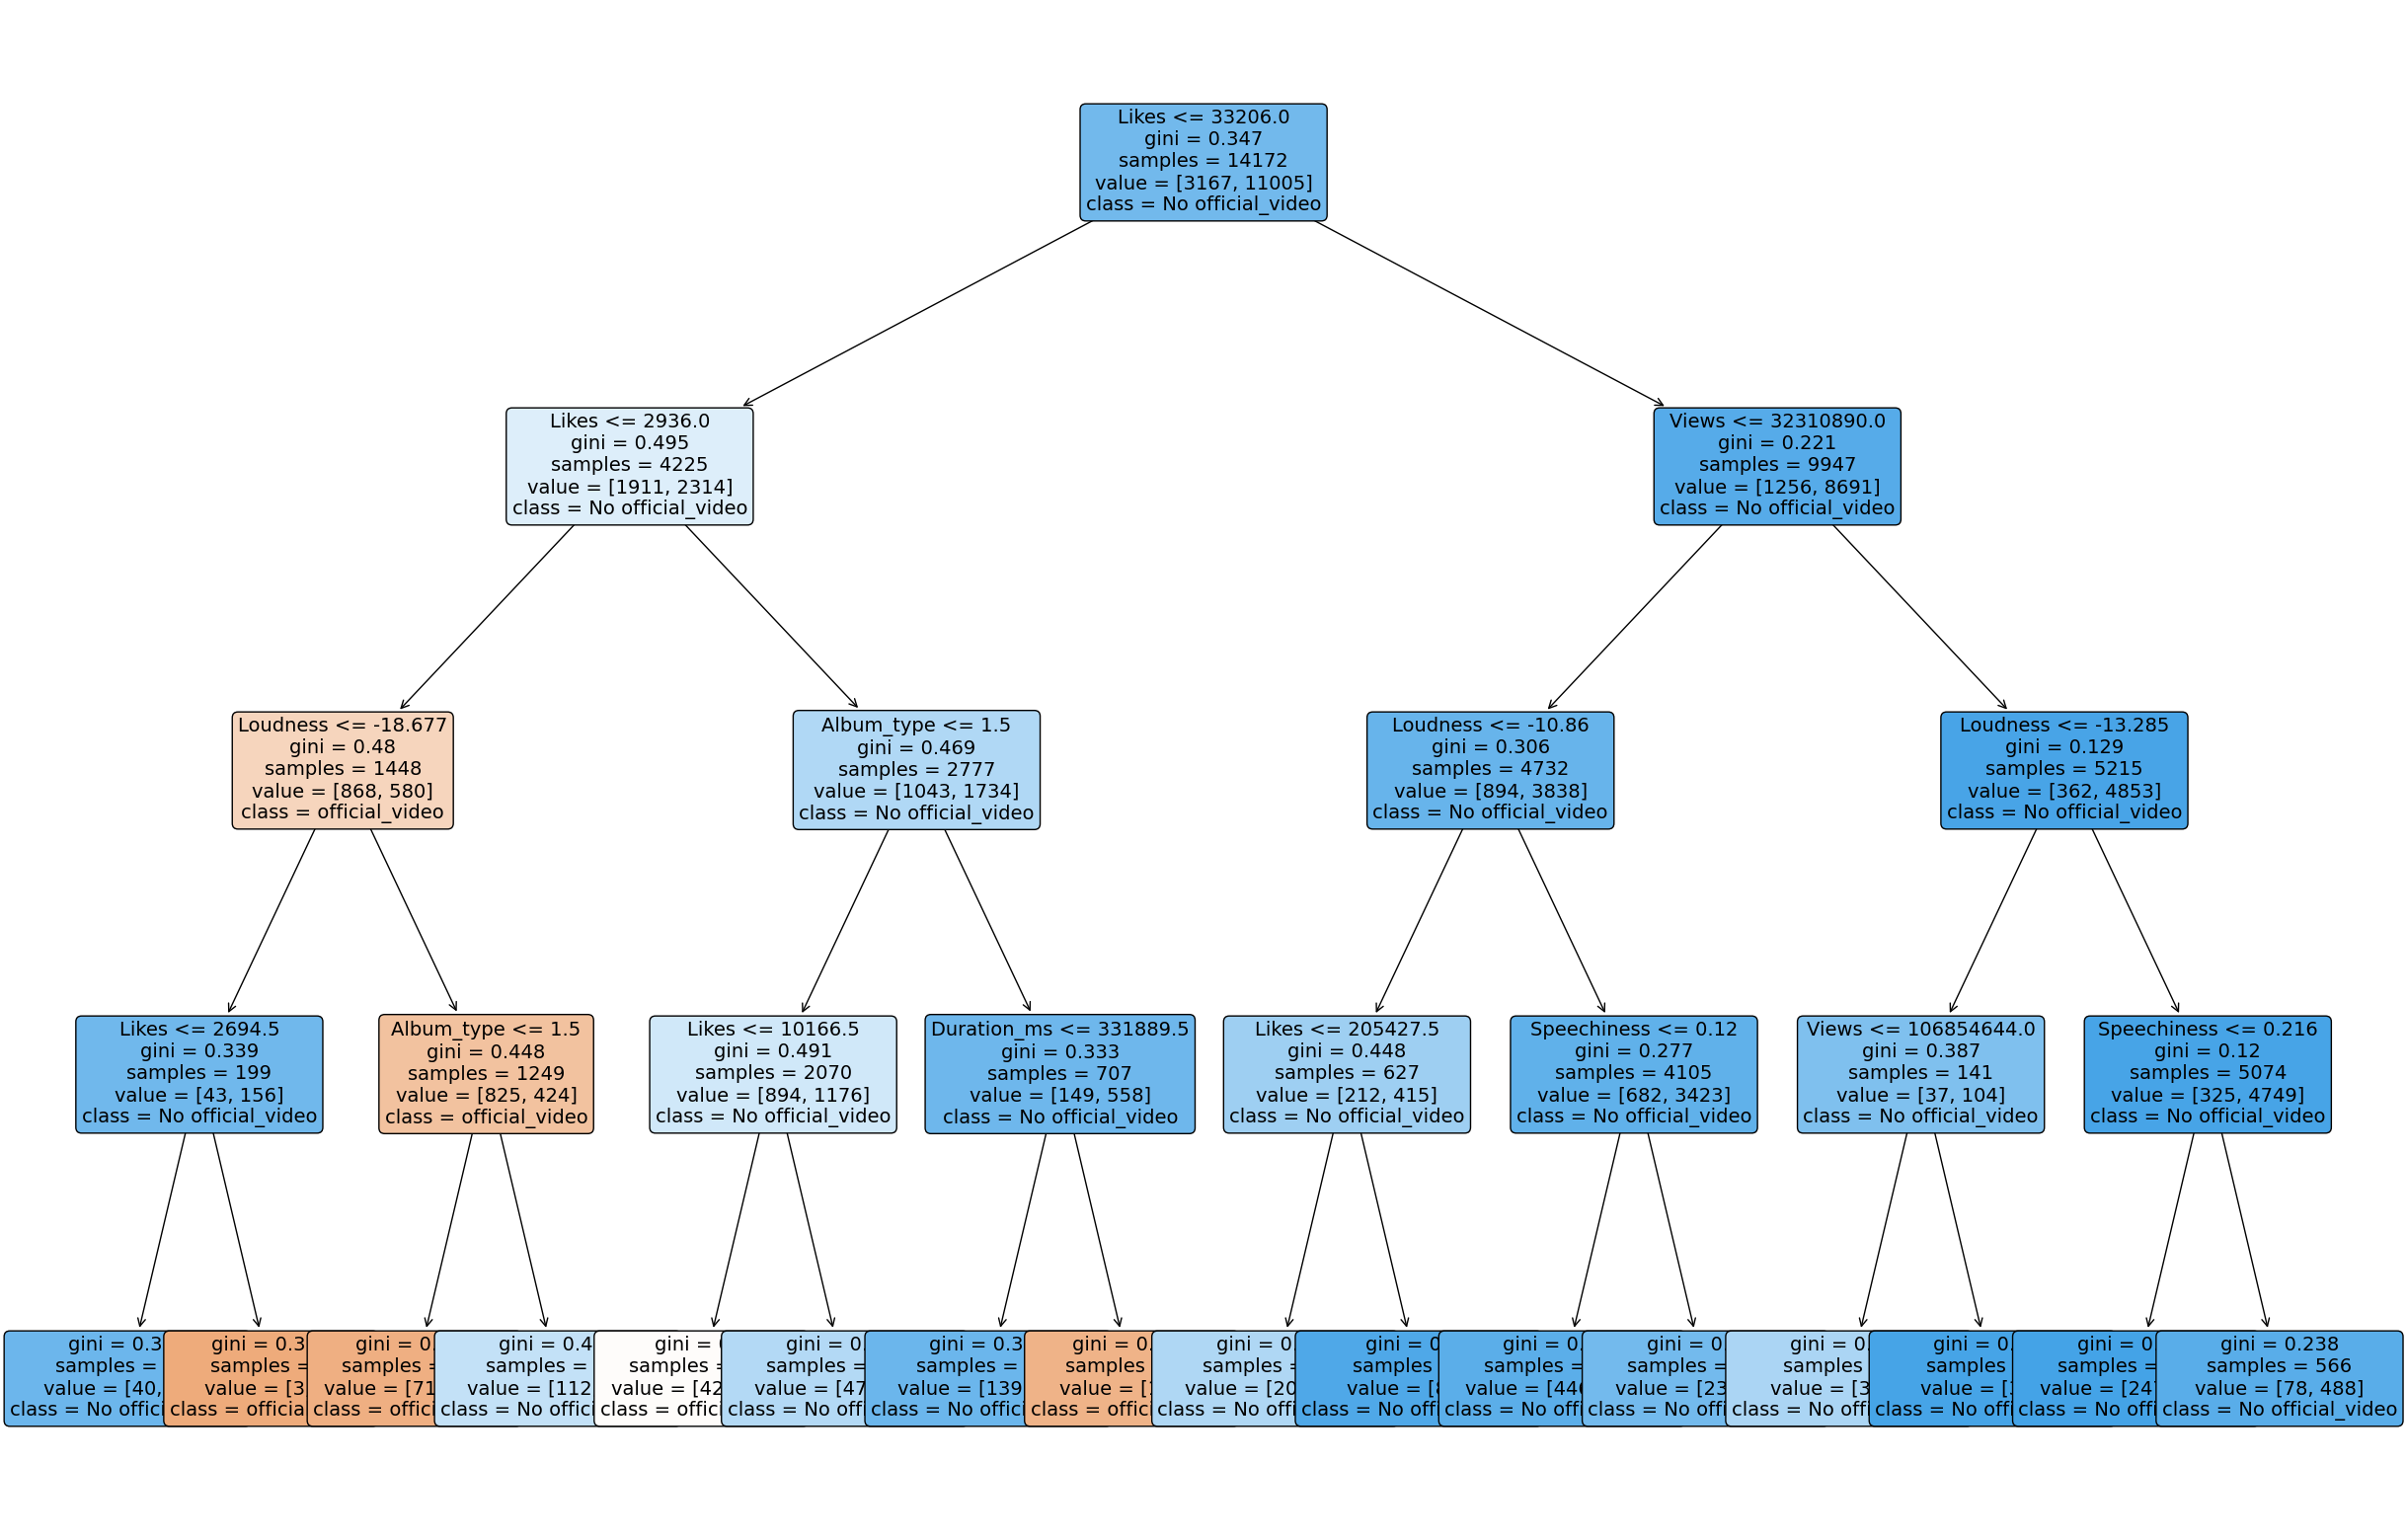

In [384]:
#plt the figure, setting a black background
plt.figure(figsize=(30,20), facecolor ='white')
#create the tree plot
a = tree.plot_tree(dt_clf,
                   #use the feature names stored
                   feature_names = X.columns,
                   #use the class names stored
                   class_names = ['official_video', 'No official_video'],
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [385]:
from sklearn import metrics
print(metrics.classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.35      0.59      0.44       805
           1       0.93      0.83      0.88      5270

    accuracy                           0.80      6075
   macro avg       0.64      0.71      0.66      6075
weighted avg       0.85      0.80      0.82      6075



now we can fill our null values using the model we made

In [386]:
classify = df.query("official_video == 2")
X = classify.drop(['Artist','Track','Album','Stream','official_video','Licensed'],axis=1)

In [387]:
ofvid_pred = dt_clf.predict(X)
ofvid_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [388]:
df.loc[df['official_video'] == 2, 'official_video'] = ofvid_pred

# Clustering
so since we have all these music details, we could use them to categorize our data

In [397]:
df.Album_type = df.Album_type.replace({0:'album', 1:'compilation', 2:'single'})
df.Licensed = df.Licensed.replace({0:False, 1:True})
df.official_video = df.official_video.replace({0:False, 1:True})

In [461]:
df.T

0                1      \
Artist                  Gorillaz         Gorillaz   
Track             Feel Good Inc.  Rhinestone Eyes   
Album                 Demon Days    Plastic Beach   
Album_type                 album            album   
Danceability               0.818            0.676   
Energy                     0.705            0.703   
Loudness                  -6.679           -5.815   
Speechiness                0.177           0.0302   
Acousticness             0.00836           0.0869   
Instrumentalness         0.00233         0.000687   
Liveness                   0.613           0.0463   
Valence                    0.772            0.852   
Tempo                    138.559           92.761   
Duration_ms             222640.0         200173.0   
Views                693555221.0       72011645.0   
Likes                  6220896.0        1079128.0   
Licensed                    True             True   
official_video              True             True   
Stream              1040234854.0      310083733.0   

                                                          2      \
Artist                                                 Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown)   
Album             New Gold (feat. Tame Impala and Bootie Brown)   
Album_type                                               single   
Danceability                                              0.695   
Energy                                                    0.923   
Loudness                                                  -3.93   
Speechiness                                              0.0522   
Acousticness                                             0.0425   
Instrumentalness                                         0.0469   
Liveness                                                  0.116   
Valence                                                   0.551   
Tempo                                                   108.014   
Duration_ms                                            215150.0   
Views                                                 8435055.0   
Likes                                                  282142.0   
Licensed                                                   True   
official_video                                             True   
Stream                                               63063467.0   

                               3               4            5      \
Artist                      Gorillaz        Gorillaz     Gorillaz   
Track             On Melancholy Hill  Clint Eastwood         DARE   
Album                  Plastic Beach        Gorillaz   Demon Days   
Album_type                     album           album        album   
Danceability                   0.689           0.663         0.76   
Energy                         0.739           0.694        0.891   
Loudness                       -5.81          -8.627       -5.852   
Speechiness                    0.026           0.171       0.0372   
Acousticness                0.000015          0.0253       0.0229   
Instrumentalness               0.509             0.0       0.0869   
Liveness                       0.064          0.0698        0.298   
Valence                        0.578           0.525        0.966   
Tempo                        120.423         167.953      120.264   
Duration_ms                 233867.0        340920.0     245000.0   
Views                    211754952.0     618480958.0  259021161.0   
Likes                      1788577.0       6197318.0    1844658.0   
Licensed                        True            True         True   
official_video                  True            True         True   
Stream                   434663559.0     617259738.0  323850327.0   

                                                              6      \
Artist                                                     Gorillaz   
Track             New Gold (feat. Tame Impala and Bootie Brown) ...   
Album             New Gold (fea

so one way of categorizing the data by using valence and energy, like for example the song is either a happy song or sad song or an angry(or hatred) one

In [492]:
emotional = df[['Valence','Energy']]
emotional = emotional.sample(frac=0.25)
emotional

Valence  Energy
8359     0.774   0.594
13305    0.892   0.679
8187     0.951   0.944
20503    0.793   0.882
12364    0.375   0.544
...        ...     ...
16840    0.899   0.589
9492     0.884   0.546
147      0.642   0.585
19128    0.557   0.816
19963    0.265   0.798

[5141 rows x 2 columns]

At first I tried using all the rows but it took along time and turned my computer into a helicopter, so 25% was just the perfect amount

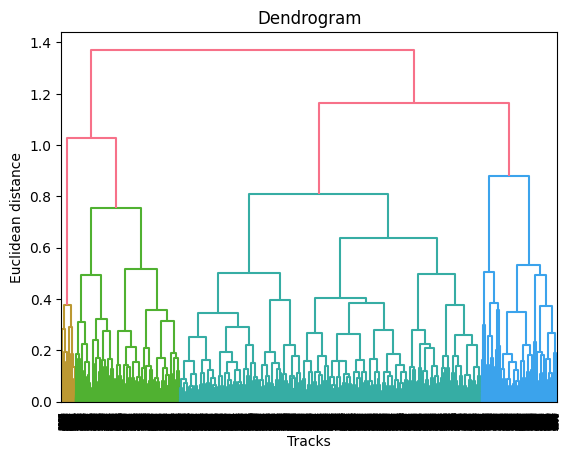

In [485]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(emotional, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Tracks')
plt.ylabel('Euclidean distance')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


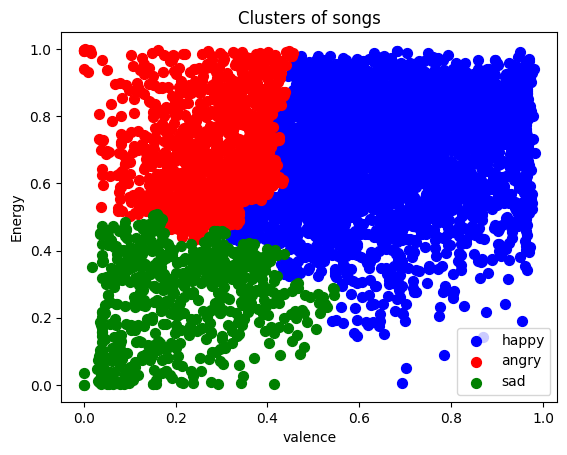

In [541]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(emotional)

# Visualising the clusters
plt.scatter(emotional[y_hc == 0].iloc[:,0], emotional[y_hc == 0].iloc[:,1], s = 50, c = 'blue', label = 'happy')
plt.scatter(emotional[y_hc == 1].iloc[:,0], emotional[y_hc == 1].iloc[:,1], s = 50, c = 'red', label = 'angry')
plt.scatter(emotional[y_hc == 2].iloc[:,0], emotional[y_hc == 2].iloc[:,1], s = 50, c = 'green', label = 'sad')
plt.title('Clusters of songs')
plt.xlabel('valence')
plt.ylabel('Energy')
plt.legend()
plt.show()

then I used the danceability and tempo to determine wether the song can fit to use in parties or is just a song to just chill or is it best for road trips

In [550]:
typo = df[['Danceability','Tempo']]
typo = typo.sample(frac=0.5)
typo

Danceability    Tempo
8777          0.752  126.022
12309         0.330  175.676
1065          0.537   90.292
2680          0.583  136.794
3427          0.537   90.292
...             ...      ...
3517          0.547  192.736
9584          0.839  129.997
14427         0.808  124.994
16817         0.586  115.808
3516          0.803   92.175

[10282 rows x 2 columns]

In [551]:
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
# define the model
model = KMeans(n_clusters=3)

In [552]:
# fit the model
model.fit(typo)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [553]:
# assign a cluster to each example
yhat = model.predict(typo)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster

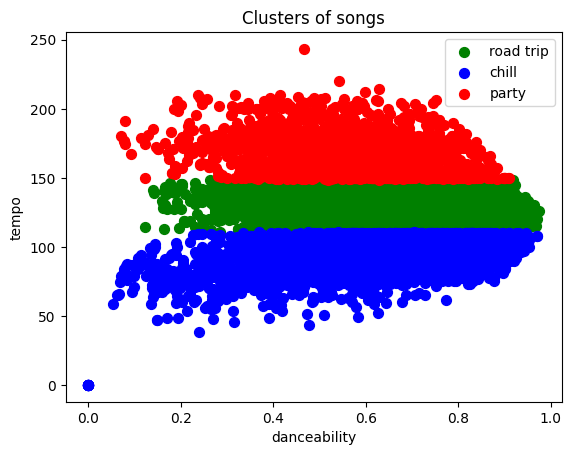

In [554]:
# Visualising the clusters
plt.scatter(typo[yhat == 0].iloc[:,0], typo[yhat == 0].iloc[:,1], s = 50, c = 'green', label = 'road trip')
plt.scatter(typo[yhat == 1].iloc[:,0], typo[yhat == 1].iloc[:,1], s = 50, c = 'blue', label = 'chill')
plt.scatter(typo[yhat == 2].iloc[:,0], typo[yhat == 2].iloc[:,1], s = 50, c = 'red', label = 'party')
plt.title('Clusters of songs')
plt.xlabel('danceability')
plt.ylabel('tempo')
plt.legend()
plt.show()

well that wasn't of any help, sadly I'll mark that one also as failure (the first failure was at the multiple linear regression)

# Thanks 🥰
Special thanks to Eng. Sohaila Diab and Eng. Mira Ehab for all their hard work, I truly appreciate all your work and the wonderfull content that you made, thank you so much <3